<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/009_superstore_Loss_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss and Cost Analysis Summary Analysis

#### Key Findings:
1. **Cost and Profitability Trends**:
   - Losses are persistent across all years, with average profitability ratios consistently in the range of -30% to -40%.
   - Rising costs, such as a 28% increase in estimated costs per order from 2014 to 2016, significantly outpace modest sales growth.

2. **Impact of Discounts**:
   - Discounts are a major driver of losses, with average discounts exceeding 50% across all years. This aggressive pricing strategy erodes profit margins without achieving proportional sales growth.

3. **Losses Across Categories and Regions:**
   - **Furniture**: High costs in products like tables and bookcases drive significant losses. Average losses reach -\$51.76 per order with the highest estimated costs (\$241.10).
   - **Office Supplies**: Losses amplified by aggressive discounting, especially in sub-categories like binders and appliances. Discounts average 0.64, leading to steep profitability declines.
   - **Technology**: Lowest average losses (-$27.24) with relatively controlled discounts (0.31). Moderate costs (\$151.70) offer room for optimized growth.

4. **Regional Insights:**
   - **Central Region**: Leads in losses due to heavy discounting (0.59 average) and inefficiencies in high-cost states like Texas and Illinois.
   - **East Region**: Faces cost inefficiencies, with Pennsylvania and Ohio showing high estimated costs but moderate losses.
   - **South Region**: The most cost-efficient but still affected by high discounts (0.52) in Florida and Tennessee.
   - **West Region**: High variability in costs and losses, with California balancing costs and profitability while Oregon and Arizona lag behind.

5. **Sub-Category Focus:**
   - **Furniture Tables and Bookcases**: Consistently rank among top loss drivers across regions due to elevated costs.
   - **Office Supplies Appliances**: Heavy discounts (0.8 average) erode profitability.
   - **Technology Machines**: Costs and discounts combine to drive losses; requires vendor renegotiations.

6. **Operational Metrics:**
   - Discounts are a recurring challenge, consistently exceeding 0.5 across categories.
   - High variability in costs suggests inefficiencies in supply chain and procurement processes.


#### Strategic Recommendations:
1. **Cost Reduction**:
   - Focus on renegotiating vendor contracts and streamlining supply chains in high-cost states (e.g., Texas, Pennsylvania) and categories (e.g., Furniture).
   - Address inefficiencies in regions with high cost variability, such as the Central and West.

2. **Discount Optimization**:
   - Reduce discounts in categories and regions where they are disproportionately high (e.g., Central Region, Office Supplies).
   - Align discounts with high-margin products and use them strategically to boost profitability rather than indiscriminate sales volume.

3. **Focus on High-Impact Areas**:
   - **Regions**: Target cost and discount improvements in the Central and East regions, which show the largest opportunities for improvement.
   - **Categories**: Address operational inefficiencies in Furniture and reduce discounting in Office Supplies.
   - **States**: Prioritize action in high-cost, high-loss states like Texas, Illinois, and Pennsylvania.

4. **Replicate Successful Models**:
   - Learn from the South Region, which demonstrates efficient cost control and lower losses.
   - Study California and Washington’s balanced cost and profitability approach to apply best practices in other regions.



### Load & Process Data

Dataset loaded successfully.
Removed 4985 duplicate rows.
Column: Sales
Lower Fence: -259.31, Upper Fence: 475.57
Original Dataset: 5009 rows
Non-Outliers: 4399 rows (87.82%)
Outliers: 610 rows (12.18%)


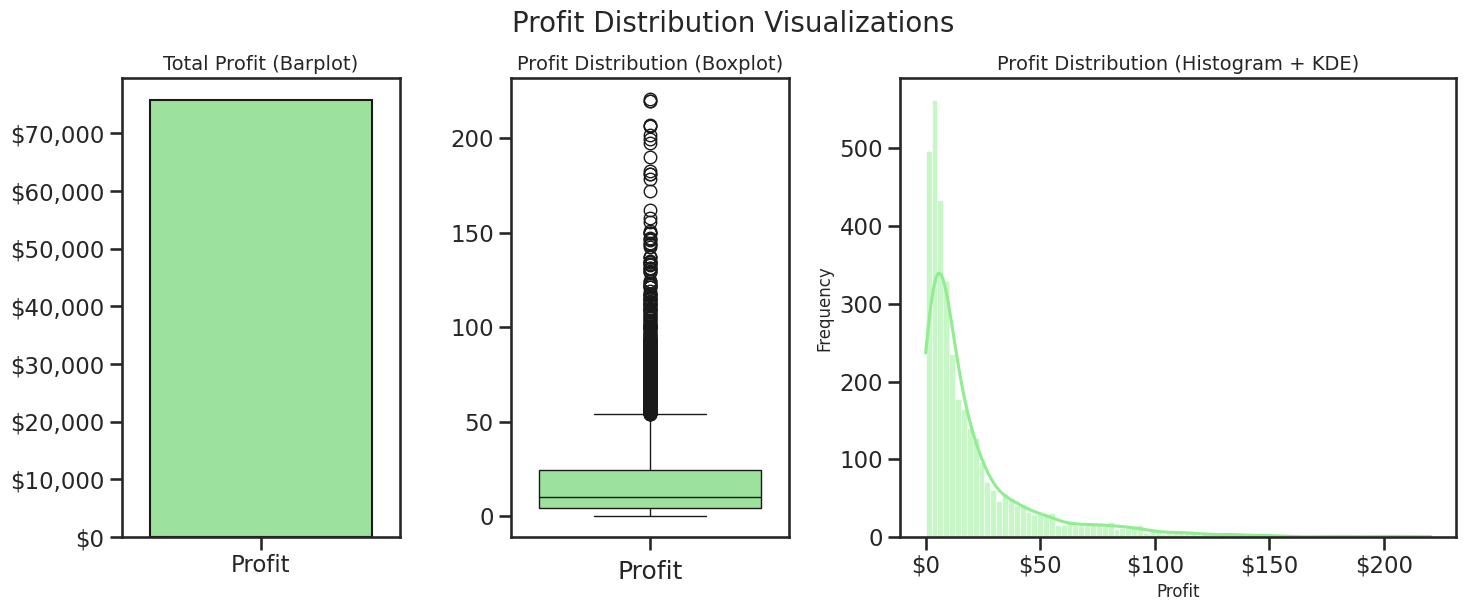

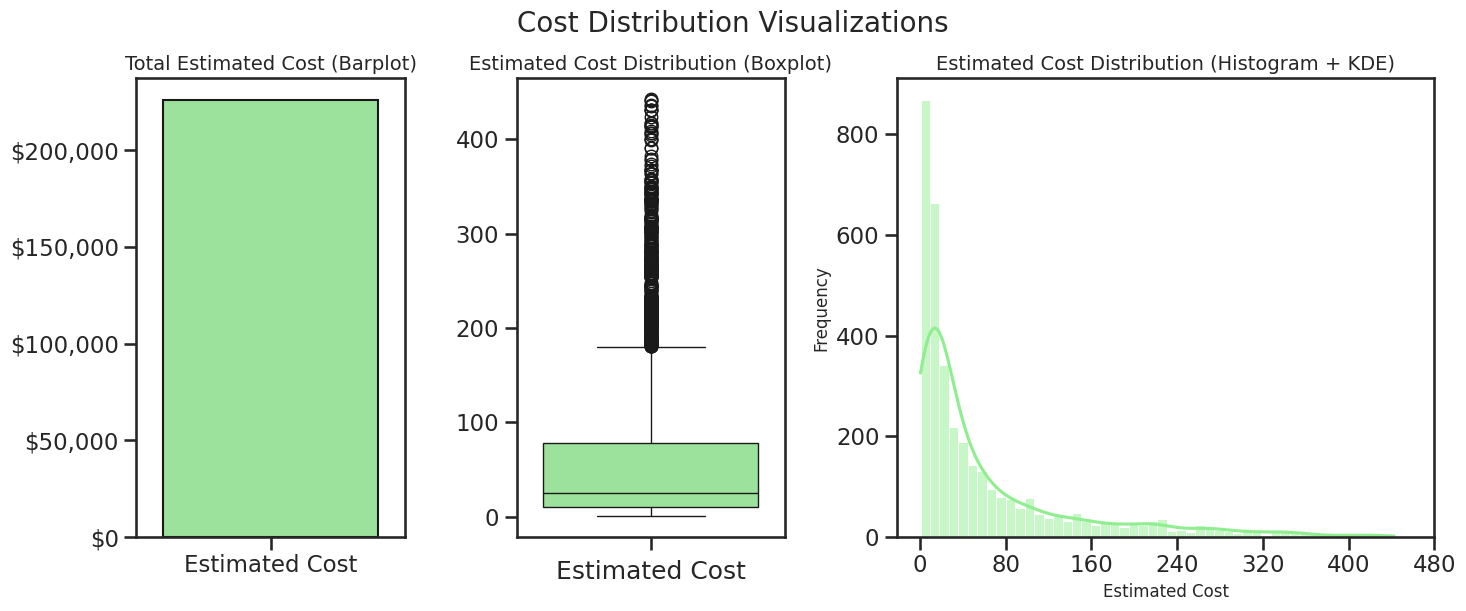

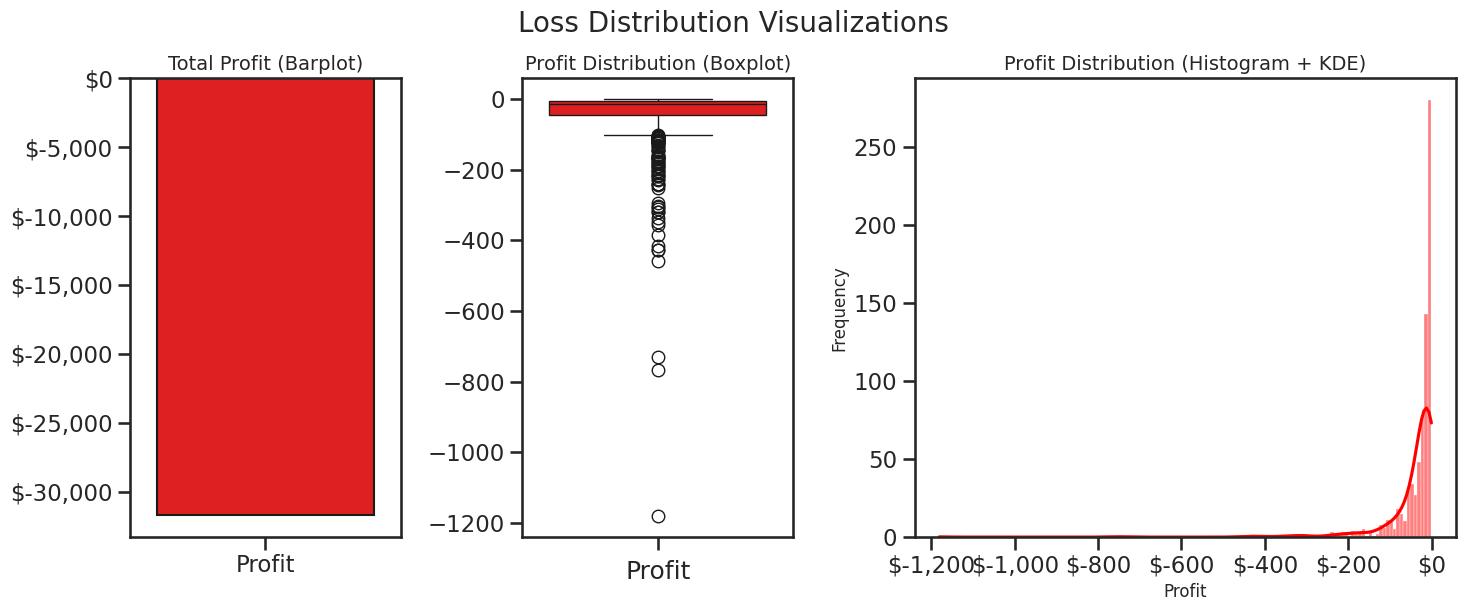

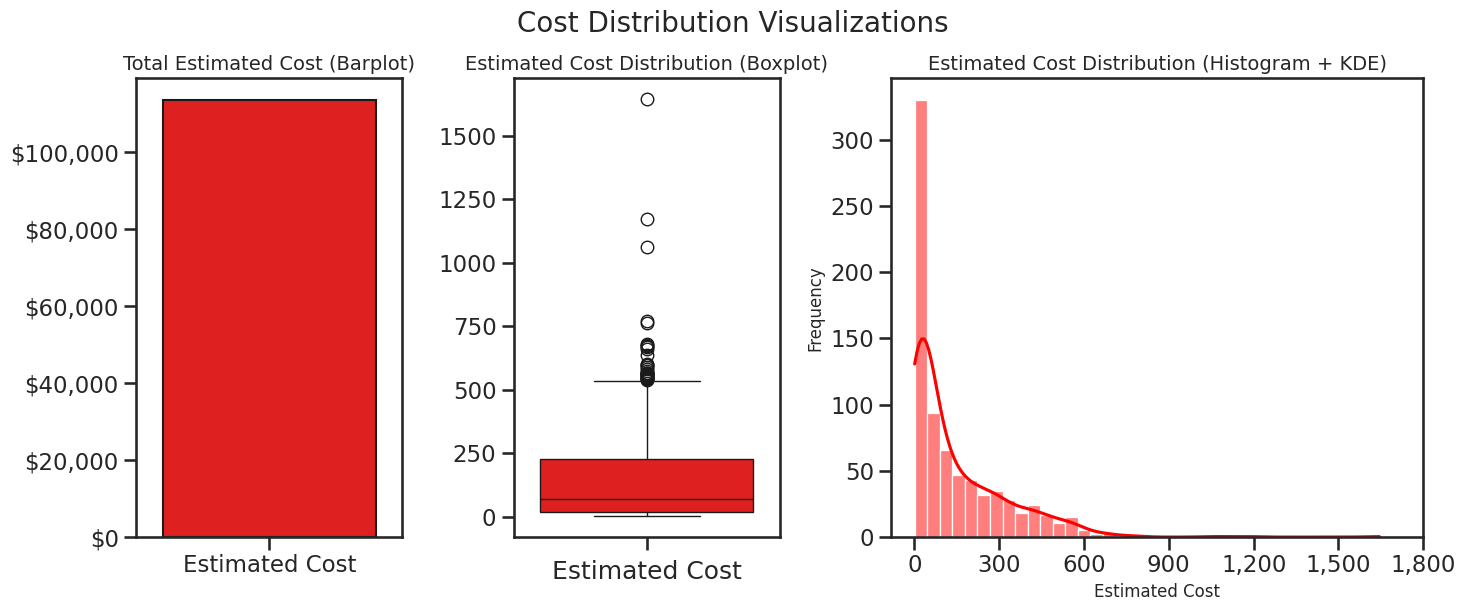

In [4]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Sub-Category', 'Quantity', 'Estimated Cost', 'Average Discount',
                   'Discount', 'Total Quantity', 'Profit Margin', 'Regional Market Share (%)', 'Profit per Category', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Step 7: Remove outliers in the 'Sales' column using Tukey's Fences
filtered_data, outliers = dpu.remove_outliers_tukey(data, column='Sales', plot=False)

# Group 1: Data with losses (Profit < 0)
data_losses = filtered_data[filtered_data['Profit'] < 0]
# Group 2: Data with profits (Profit >= 0)
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# plot the profit and cost data
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')
dvu.plot_sales_distribution_2(data_profits, column='Estimated Cost', title='Cost Distribution Visualizations', color='lightgreen', round_decimals=0)

# plot the loss and discountdata
dvu.plot_sales_distribution(data_losses , column='Profit', title='Loss Distribution Visualizations', color='red')
dvu.plot_sales_distribution_2(data_losses , column='Estimated Cost', title='Cost Distribution Visualizations', color='red', round_decimals=0)


### Splitting Data into Profits and Losses Rationale

Analyzing profits and losses separately is a strategic approach to uncover the underlying causes of financial performance and inform actionable decisions. Here’s why this methodology makes sense:

1. **Targeted Analysis of Losses:** By isolating data with losses, the analysis can focus specifically on identifying patterns and drivers behind negative profitability, such as high discounts, excessive costs, or inefficient operations, without being diluted by profitable transactions.

2. **Distinct Characteristics:** Profitable and loss-making transactions often have fundamentally different attributes (e.g., discount levels, cost structures). Separating these datasets ensures that trends and anomalies unique to each group are not obscured in aggregated analysis.

3. **Actionable Insights:** Understanding what differentiates loss-making transactions from profitable ones allows for precise interventions, such as adjusting pricing strategies, optimizing cost controls, or targeting high-loss segments.

4. **Visualization and Clarity:** Plotting profits and losses independently makes it easier to visualize their distinct distributions, such as the broader range of costs and higher discount levels in loss-making data, leading to clearer storytelling and better stakeholder communication.

5. **Improved Decision-Making:** This approach ensures that decisions are data-driven and context-specific, helping to minimize losses while reinforcing strategies that maximize profitability.

# Loss & Cost Summary Statistics

Figure saved as /content/loss_cost_sumamry_stats.png


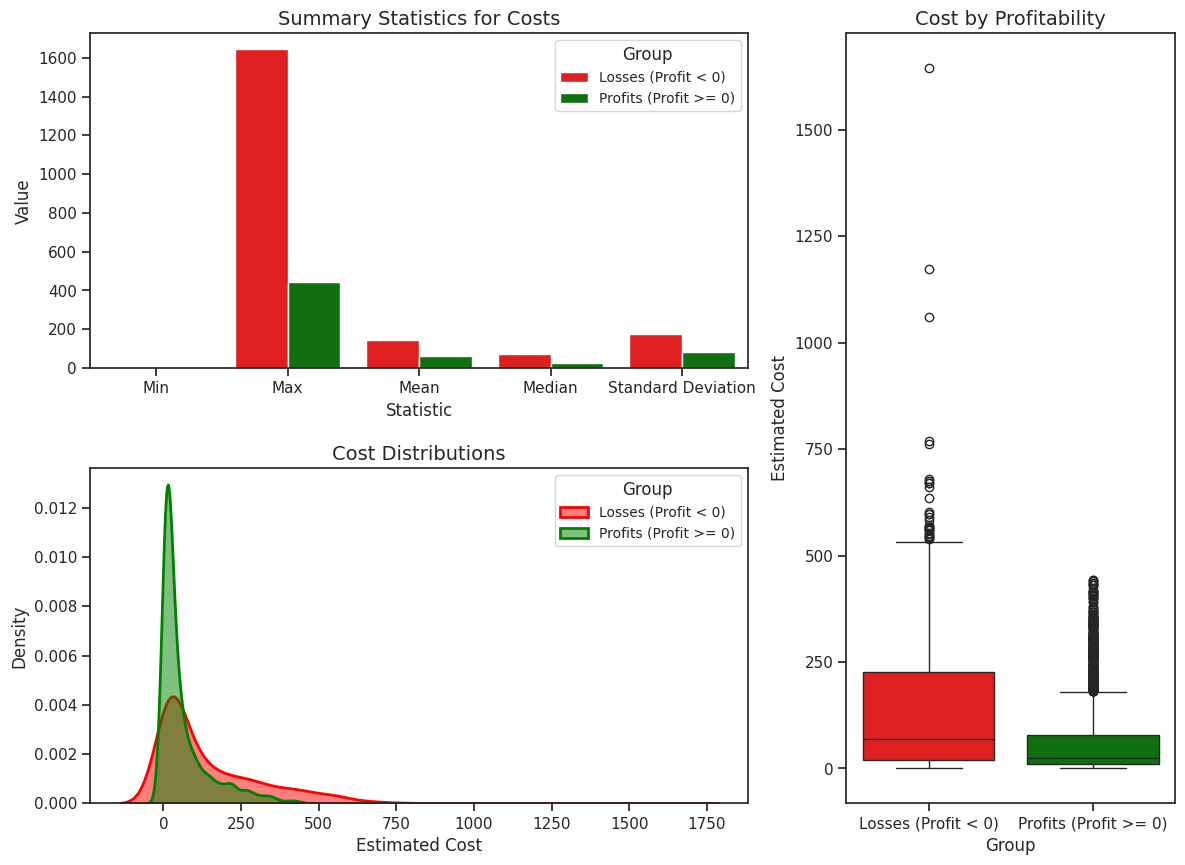

In [5]:
# Calculate stats for both groups
cost_stats_losses = dvu.calculate_discount_stats(data_losses, column='Estimated Cost')
cost_stats_profits = dvu.calculate_discount_stats(data_profits, column='Estimated Cost')

# Combine the stats into a single DataFrame
cost_summary_table = pd.DataFrame({
    'Statistic': cost_stats_losses.keys(),
    'Losses (Profit < 0)': cost_stats_losses.values(),
    'Profits (Profit >= 0)': cost_stats_profits.values()
})

# Visualize the metrics and save the figure
save_path = "/content/loss_cost_sumamry_stats.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Call the function
dvu.plot_discount_analysis_grid(data_losses, data_profits, cost_summary_table, column='Estimated Cost')

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Profit and Lost Cost Distribution Analysis

1. **Average Cost Contrast**:
   - Losses: The **average cost** is **\$146.36**, more than double the average cost for profitable transactions, signaling that higher costs are a major driver of losses.
   - Profits: The **average cost** is **\$62.35**, reflecting more efficient spending.

2. **Cost Range Disparity**:
   - Losses: Costs range from **\$1.45** to **\$1,644.53**, indicating that many loss-making transactions are associated with extremely high costs.
   - Profits: Costs range from **\$0.55** to **\$442.43**, suggesting a narrower and more controlled range for profitable transactions.

3. **Central Tendency (Median)**:
   - Losses: The **median cost** is **\$70.32**, with many transactions showing costs significantly above this midpoint.
   - Profits: The **median cost** is **\$25.21**, indicating that the majority of profitable transactions involve much lower costs.

4. **Variation in Costs (Spread)**:
   - Losses: The **standard deviation** of costs is **\$177.41**, showing a much wider variability in costs, which could reflect inconsistent cost control.
   - Profits: The **standard deviation** of costs is **\$82.78**, indicating tighter and more predictable cost patterns.



In [7]:
# data_losses[['Profit', 'Estimated Cost']].describe()
# data_profits[['Profit', 'Estimated Cost']].describe()

# Generate descriptive statistics for losses and profits
losses_stats = data_losses[['Profit', 'Estimated Cost']].describe().transpose()
profits_stats = data_profits[['Profit', 'Estimated Cost']].describe().transpose()

# Add a column to indicate whether the stats are for losses or profits
losses_stats['Category'] = 'Losses'
profits_stats['Category'] = 'Profits'

# Combine the two tables into a single DataFrame
combined_stats = pd.concat([losses_stats, profits_stats])

# Move the 'Category' column to the front for clarity
combined_stats = combined_stats.reset_index().rename(columns={'index': 'Metric'})
combined_stats = combined_stats[['Category', 'Metric'] + [col for col in combined_stats.columns if col not in ['Category', 'Metric']]]

# Display the combined table
combined_stats


,Category,Metric,count,mean,std,min,25%,50%,75%,max
0,Losses,Profit,776.0,-40.877741,82.413352,-1181.2824,-44.18550,-14.3856,-5.698125,-0.2685
1,Losses,Estimated Cost,776.0,146.359383,177.410443,1.4484,18.88275,70.3242,225.663900,1644.5304
2,Profits,Profit,3623.0,20.916086,28.072311,0.0000,4.32810,10.0485,24.222300,220.4853
3,Profits,Estimated Cost,3623.0,62.350696,82.777655,0.5544,9.98840,25.2120,78.045600,442.4250


In [ ]:
# Display the summary table
cost_summary_table

,Statistic,Losses (Profit < 0),Profits (Profit >= 0)
0,Min,1.448400,0.554400
1,Max,1644.530400,442.425000
2,Mean,146.359383,62.350696
3,Median,70.324200,25.212000
4,Standard Deviation,177.410443,82.777655


### Loss & Costs Summary Statistics Analysis

1. **Key Comparisons**:
   - **Mean Cost**: Loss-making transactions have a **mean cost (146.36)** more than double that of profitable ones (62.35), indicating inefficiency and potential overinvestment in unprofitable areas.
   - **Median Cost**: Losses show a **median cost (70.32)** nearly three times higher than profits (25.21), reinforcing the disparity.
   - **Maximum Cost**: Costs for losses peak at **1,644.53**, far exceeding the **442.42** maximum for profits, highlighting extreme outliers driving inefficiency.

2. **Variability**:
   - Losses exhibit significantly higher **standard deviation (177.41)** in costs compared to profits (82.78), suggesting inconsistent cost management in loss-making transactions.

3. **Actionable Insights**:
   - Focus on controlling high-cost outliers to minimize their impact on overall losses.
   - Investigate loss-making transactions with excessively high costs to identify operational inefficiencies or misaligned spending.

# Loss & Costs by Year

In [8]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits = dpu.calculate_aggregate_metrics(df, group_by_columns=['Order Year'])
table_profits

,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,-5094.7210,-77.652874,-36.527573,16819.9770,11725.2560,0.534420,982,468,24.668116
1,2015,-6355.1013,-72.897417,-34.182110,22368.9241,16013.8228,0.523032,1150,559,24.755537
2,2016,-8898.9544,-64.173640,-32.491276,33886.3454,24987.3910,0.503796,1642,788,24.947869
3,2017,-11372.3503,-72.395193,-33.967952,40499.6347,29127.2844,0.508352,1959,970,25.030467



Summary Table for Profits by Year:
Figure saved as /content/profit_by_year.png


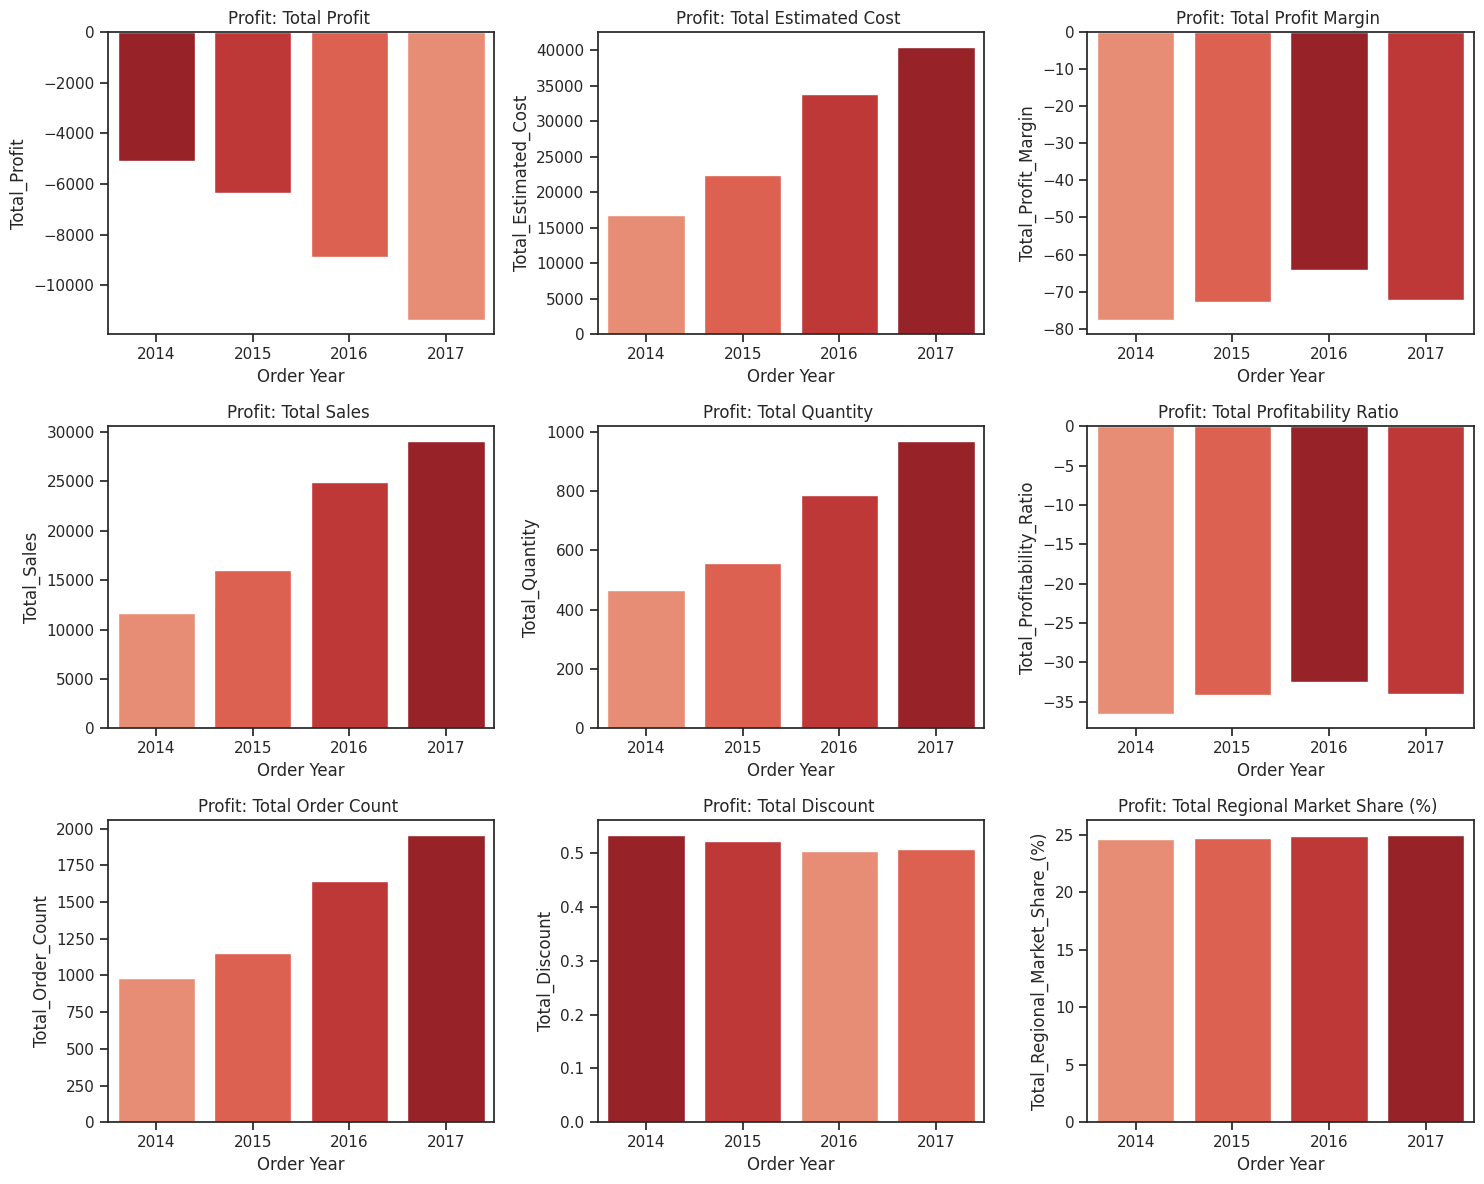

In [ ]:
# define metrics
metrics = [
    'Total_Profit',
    'Total_Estimated_Cost',
    'Total_Profit_Margin',
    'Total_Sales',
    'Total_Quantity',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Discount',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_year.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Loss & Cost by Year Analysis

1. **Increasing Losses Over Time: Losses have grown consistently from \$5,094 in 2014 to \$11,372 in 2017**, indicating worsening financial performance in loss-making areas. This trend requires immediate action to identify and address key loss drivers.

2. **Estimated costs have surged from \$16,819 in 2014 to \$40,499 in 2017**, outpacing sales growth, which increased from \$11,725 to $29,127. This imbalance suggests inefficiencies in operations or pricing strategies that need to be reviewed.

3. **Consistently High Discounts:** Discount levels remain significant across all years, averaging around 0.50. Discounts may be a major contributor to the losses, particularly if they are not generating sufficient sales volume to offset reduced profit margins.

4. **Order and Quantity Growth Without Profitability:** While order counts and quantities have increased, they have not translated into profitability. This highlights the need to evaluate product-level performance and pricing strategies.

5. **Stable Market Share:** Despite the losses, the regional market share has remained steady at approximately 24-25%, indicating that market position is not the primary issue. Efforts should focus on cost control and optimizing pricing to convert market presence into profitability.

**Actionable Focus Areas:**
- Review and adjust discounting strategies to balance sales volume and profitability.
- Investigate high-cost items or categories and explore cost-reduction measures.
- Prioritize loss-making products or regions for targeted interventions.
- Conduct a detailed profitability analysis for key customer segments and order types.

# Region

In [9]:
df = data_losses.copy()

# Define metrics for visualization
metrics = [
    'Profit',
    'Estimated Cost',
    'Profit Margin',
    'Sales',
    'Quantity',
    'Profitability Ratio',
    'Order Count',
    'Discount',
    'Regional Market Share (%)'
]

# Use the aggregate function to calculate metrics for each group
table_profits_region = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region'])
table_profits_region

,Region,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,-16128.3345,-108.814011,-43.695413,41594.8857,25466.5512,0.594506,2368,1225,21.819594
1,East,-8084.3891,-42.716919,-26.974108,37155.7851,29071.3960,0.468182,1634,709,29.548188
2,South,-2768.4291,-51.456492,-31.323555,11949.1321,9180.7030,0.518349,786,397,17.052140
3,West,-4739.9743,-40.195122,-23.745576,22875.0783,18135.1040,0.384146,945,454,31.580078


Figure saved as /content/profit_by_region_3x3.png


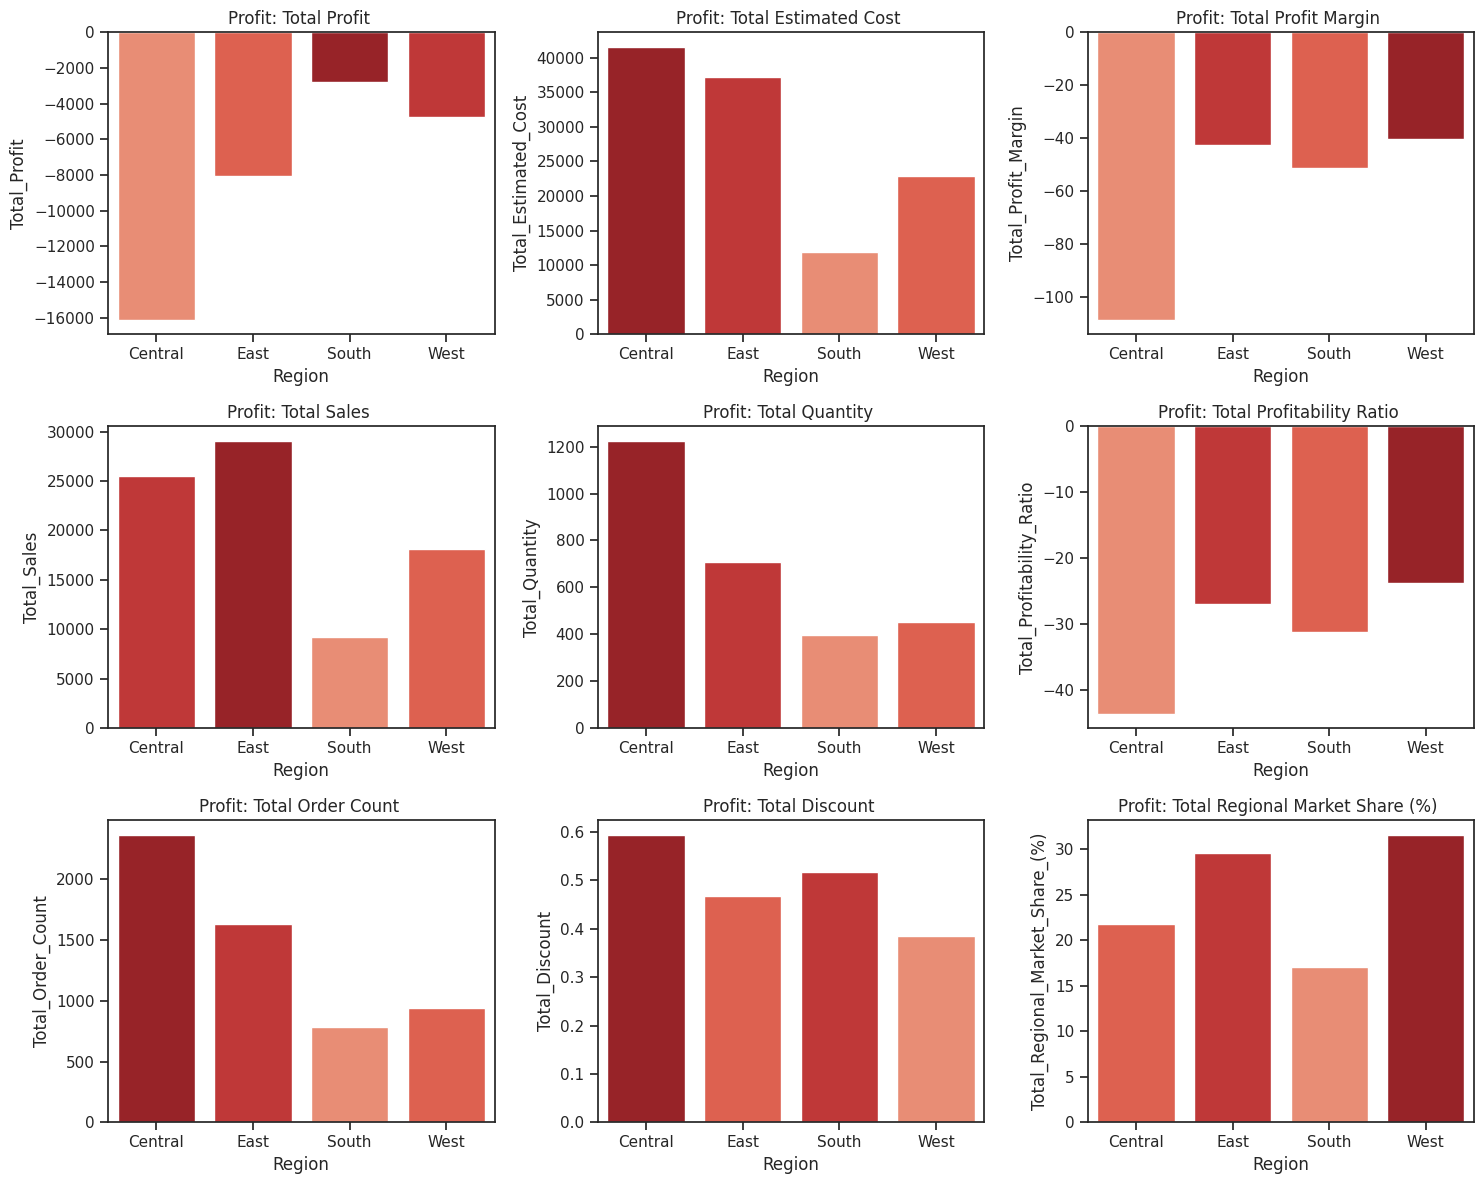

In [10]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Estimated_Cost',
    'Total_Profit_Margin',
    'Total_Sales',
    'Total_Quantity',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Discount',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_region_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits_region,
    metrics=metrics,
    group_by_column='Region',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### **Profit** and **Costs** by Region Analysis

1. **Central Region**:
   - Largest losses at **-\$16,128.33**, with a severe **profit margin of -108.81%**, reflecting deep inefficiencies.
   - **Estimated costs of \$41,594.89** are disproportionately high relative to sales, indicating operational or pricing challenges.
   - Discounts are among the highest (**0.59 average discount**), likely exacerbating the profit challenges.

2. **East Region**:
   - Losses of **-\$8,084.39** are substantial but less severe than the Central region, with a **profit margin of -42.72%**.
   - **Estimated costs of \$37,155.79** indicate potential cost control issues, though slightly better aligned with sales compared to Central.
   - Discounts are moderate (**0.47 average discount**), suggesting pricing adjustments could improve margins.

3. **South Region**:
   - Lowest losses at **-\$2,768.43**, with a **profit margin of -51.46%**, still showing room for improvement.
   - Costs are relatively well-contained at **11,949.13**, reflecting tighter operational controls compared to other regions.
   - Discounts are significant (**0.52 average discount**) and could be a factor in narrowing margins.

4. **West Region**:
   - Losses at **-\$4,739.97**, with the best **profit margin of -40.20%** among regions.
   - **Estimated costs of \$22,875.08** are better aligned with sales compared to other regions.
   - Discounts are the lowest (**0.38 average discount**), indicating relatively good pricing discipline.

### Key Insights:
- **Central Region**: Immediate focus is needed on reducing costs and controlling discounts to address the most severe losses.
- **East Region**: Cost and discount optimization could significantly improve performance, given moderate inefficiencies.
- **South Region**: Losses are the smallest, but high discounts warrant attention to avoid further margin erosion.
- **West Region**: Strongest cost and discount control among all regions; could be a model for improving other regions' performance.

# Region & State

In [14]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits_region_state = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region', 'State'])
table_profits_region_state

,Region,State,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Illinois,-6415.9455,-113.092166,-46.175773,16876.9265,10460.9810,0.616935,930,495,21.819594
1,Central,Texas,-9712.3890,-106.161555,-42.157590,24717.9592,15005.5702,0.580600,1438,730,21.819594
2,East,Connecticut,-15.5826,-8.571429,-7.894737,197.3796,181.7970,0.300000,6,1,29.548188
3,East,Delaware,-37.1124,-18.571429,-15.662651,236.9484,199.8360,0.300000,6,4,29.548188
4,East,Maryland,-23.9372,-10.000000,-9.090909,263.3092,239.3720,0.300000,4,2,29.548188
5,East,New Jersey,-31.3722,-12.857143,-11.392405,275.3782,244.0060,0.300000,7,2,29.548188
6,East,New York,-1178.9400,-24.223856,-18.281266,5974.3100,4795.3700,0.335294,121,41,29.548188
7,East,Ohio,-2832.1161,-47.901120,-29.611469,11820.3921,8988.2760,0.505882,652,300,29.548188
8,East,Pennsylvania,-3951.5718,-42.996523,-27.053993,18133.5668,14181.9950,0.467257,828,355,29.548188
9,East,Rhode Island,-13.7568,-5.714286,-5.405405,254.5008,240.7440,0.300000,10,4,29.548188


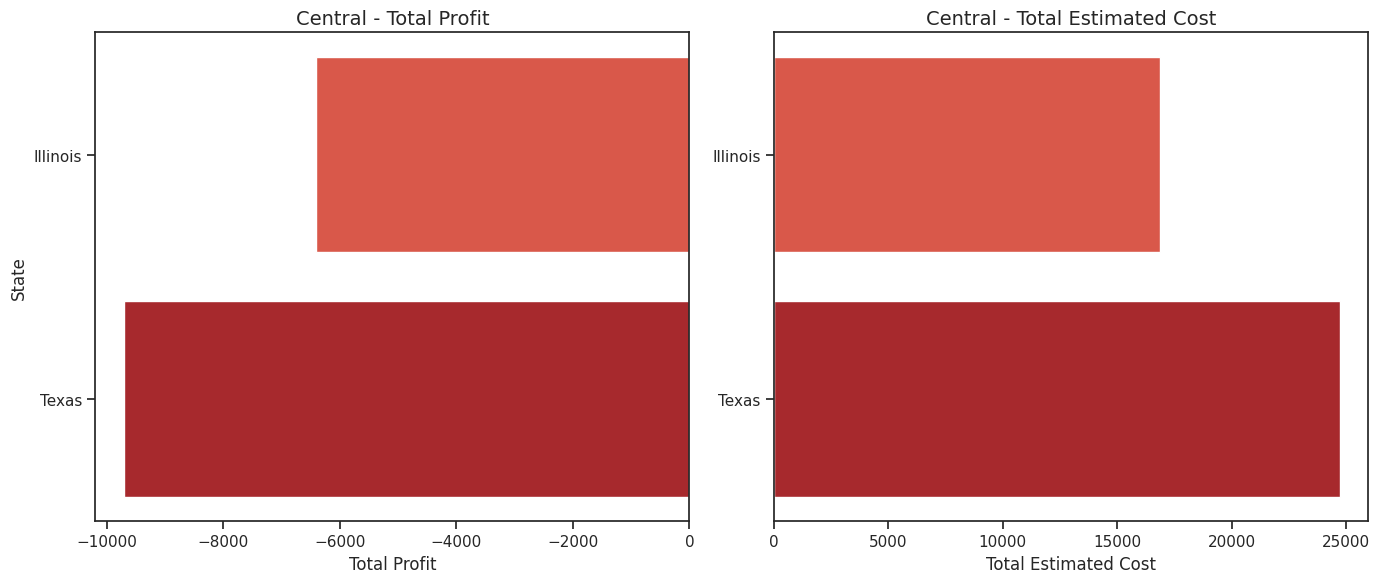

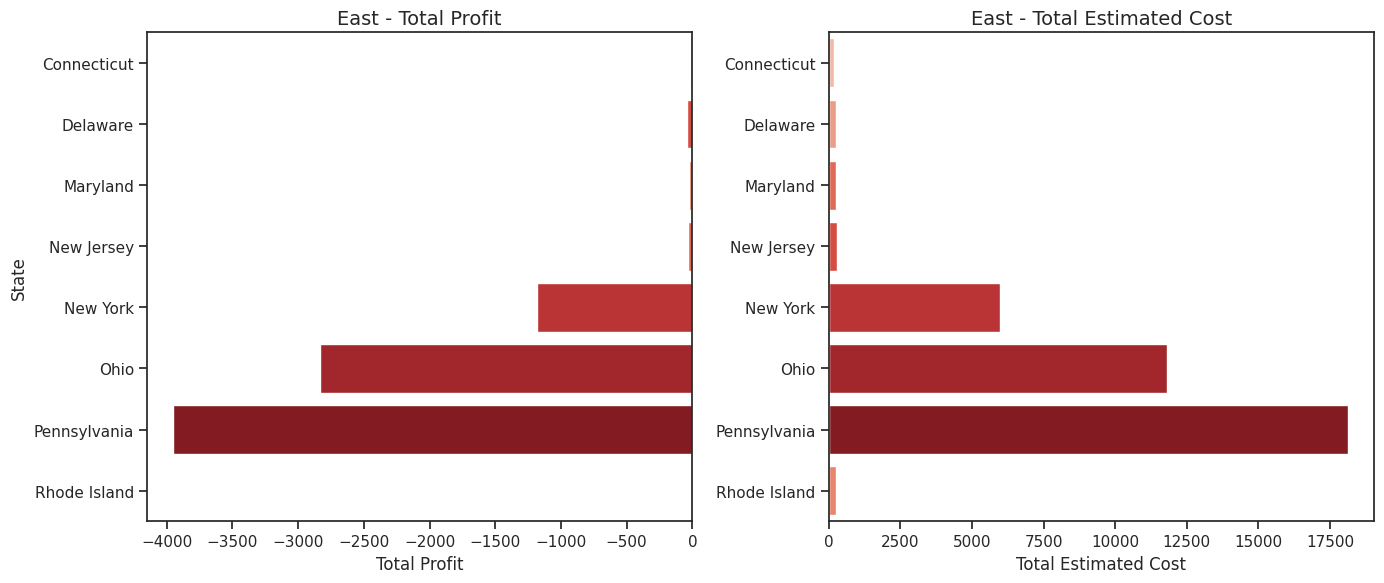

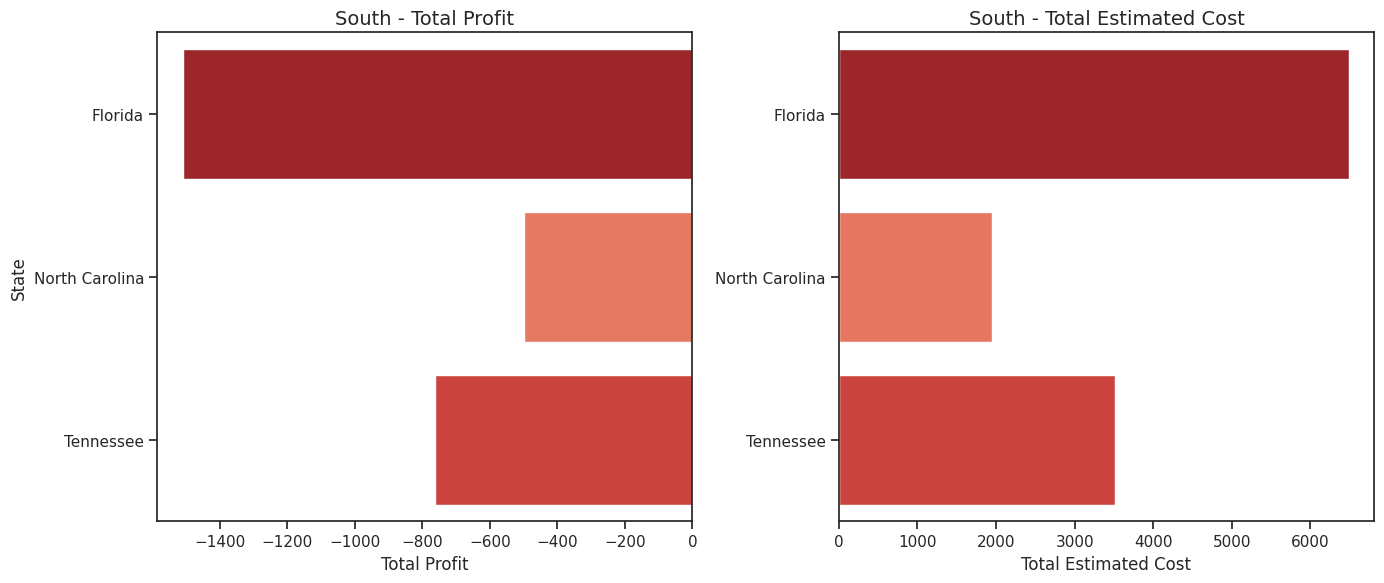

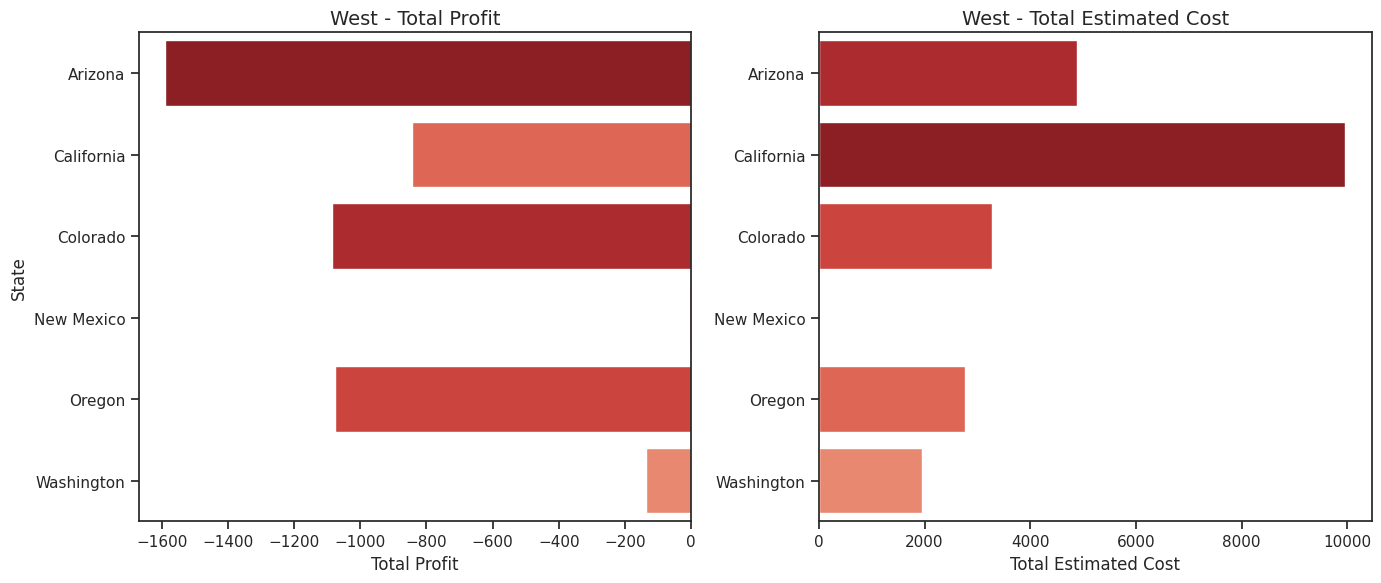

In [48]:
# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

# Filepath template
save_path_template = "/content/{group}_loss_cost.png"

# Call the function
dvu.plot_discount_loss_grid_1x2(
    data=table_profits_region_state,
    group_by_columns=['Region', 'State'],
    discount_column="Total_Estimated_Cost",
    profit_column="Total_Profit",
    palette1=palette1,
    palette2=palette2,
    save_path_template=save_path_template
)


### Region & State Analysis
### Analysis of Loss and Cost by Region and State

1. **Central Region**:
   - **Texas** leads in losses (**-\$9,712.39**) and has the highest estimated costs (**\$24,717.96**), suggesting significant inefficiencies in cost management relative to sales.
   - **Illinois** also shows substantial losses (**-\$6,415.95**) and high costs (**\$16,876.93**), with both states showing high discounts above **0.58**, which could be driving down profitability.

2. **East Region**:
   - **Pennsylvania** and **Ohio** exhibit the highest losses in the region (**-\$3,951.57** and **-\$2,832.12**, respectively), with high associated costs (**\$18,133.57** and **\$$11,820.39**) despite moderate discounts (both around **0.50**).
   - Smaller states like **New York** and **New Jersey** also incur losses, though their costs are more modest (**\$5,974.31** and **\$275.38**, respectively), hinting at possible inefficiencies in specific product lines or operations.

3. **South Region**:
   - **Florida** leads the region in losses (**-\$1,509.94**) and high estimated costs (**\$6,484.87**), with a relatively high discount rate (**0.54**), indicating that aggressive discounting might not be yielding the desired results.
   - **North Carolina** and **Tennessee** follow similar patterns with moderate losses (**-497.43** and **-761.05**) and costs relative to sales, suggesting a need to investigate operational costs and discounting strategies.

4. **West Region**:
   - **Arizona** stands out with losses of **-\$1,590.91** and costs of **\$4,890.99**, accompanied by a high discount rate (**0.51**), pointing to discounting as a key factor in poor performance.
   - **California** has a relatively lower loss (**-\$844.10**) but significantly high costs (**\$9,959.62**), indicating potential inefficiencies beyond discounts (**0.19**).
   - Smaller states like **Oregon** and **Colorado** show substantial losses relative to their size, with high costs (**\$2,767.76** and **\$3,268.32**) and discounts exceeding **0.50**, further reinforcing the role of discounting in driving losses.

5. **Key Takeaways**:
   - States with high losses and costs—**Texas**, **Illinois**, **Pennsylvania**, **Florida**, and **Arizona**—are prime candidates for deeper cost analysis and discount optimization.
   - The strong correlation between high discount rates (above **0.50**) and losses highlights the need to reexamine discounting policies and evaluate their impact on profitability.

# Category

In [38]:
# Define metrics for visualization
metrics = [
    'Profit',
    'Estimated Cost',
    'Profit Margin',
    'Sales',
    'Quantity',
    'Profitability Ratio',
    'Order Count',
    'Discount',
    'Regional Market Share (%)'
]

# Use the aggregate function to calculate metrics for each group
table_profits_category = dpu.calculate_aggregate_metrics(df, group_by_columns=['Category'])
table_profits_category

,Category,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Furniture,-14388.3928,-35.963319,-22.256118,67026.0080,52637.6152,0.382266,2047,923,25.687639
1,Office Supplies,-15071.9634,-104.874498,-45.656145,33957.6924,18885.7290,0.643614,3024,1581,23.878809
2,Technology,-2260.7708,-20.307229,-15.567348,12591.1808,10330.4100,0.313253,662,281,27.256786


Figure saved as /content/profit_by_category_3x3.png


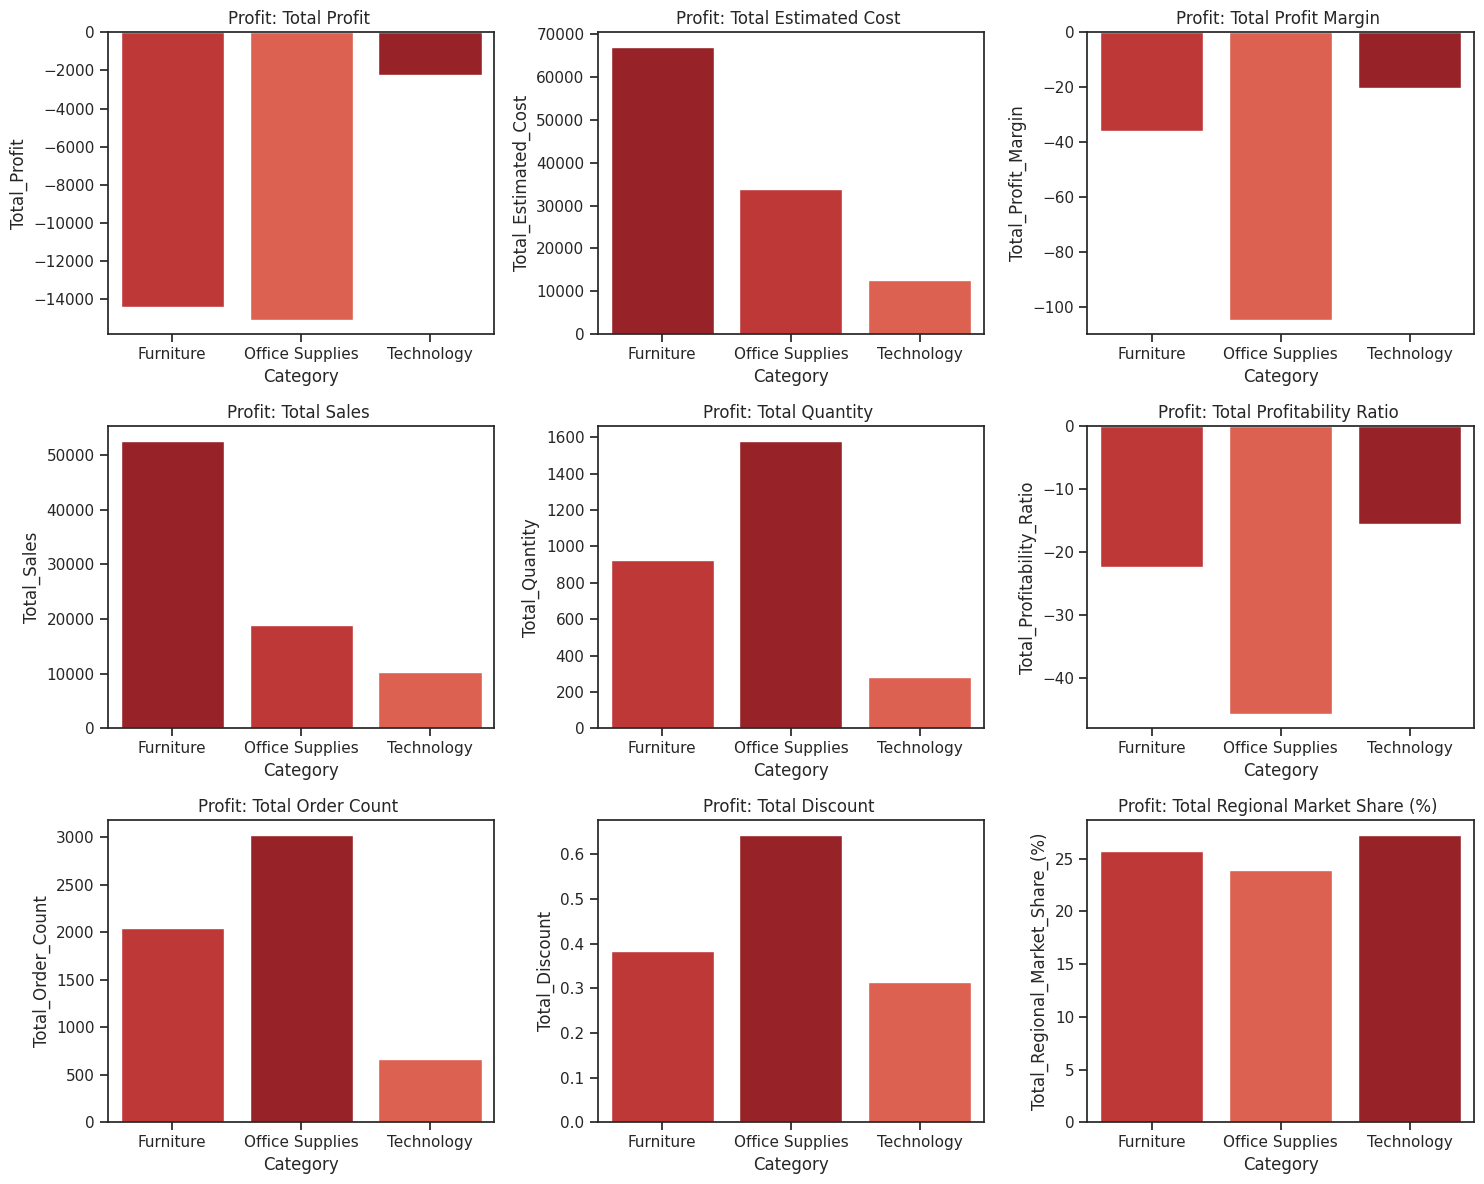

In [ ]:
# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Estimated_Cost',
    'Total_Profit_Margin',
    'Total_Sales',
    'Total_Quantity',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Discount',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_category_3x3.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[3:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits_category,
    metrics=metrics,
    group_by_column='Category',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Category Analysis

1. **Office Supplies**:
   - The highest loss at **-\$15,071.96** in profit and an extremely poor **profit margin of -\$104.87%**.
   - Costs of **\$33,957.69** far surpass sales of **\$18,885.73**, suggesting aggressive discounting (**0.64** average discount) or mismanagement.
   - With the highest **order count (3,024)** and **quantity (1,581)**, operational volume does not translate into profitability.

2. **Furniture**:
   - Significant losses of **-\$14,388.39** in profit.
   - **Estimated costs** are high at **\$67,026.01**, exceeding sales revenue (**52,637.62**), highlighting inefficiency.

3. **Technology**:
   - Comparatively lower losses of **-2,260.77**, though still negative, with the smallest profit margin deficit at **-20.31%**.
   - Costs of **12,591.18** are closer to sales revenue (**10,330.41**), indicating better cost control compared to other categories.


### Insights:
- **Furniture and Office Supplies** represent significant problem areas with poor cost control and heavy operational inefficiencies.
- **Technology**, while also unprofitable, shows a relatively better alignment between costs and sales, suggesting it could turn profitable with strategic adjustments.
- Focus on reducing costs and improving efficiencies in **Furniture** and **Office Supplies**, while leveraging **Technology**’s potential with targeted strategies.

# Sub-Category

In [44]:
# Grouping the data by Category and Sub-Category to calculate totals
summary_table = df.groupby(['Category', 'Sub-Category'], observed=True).agg({
    'Profit': 'sum',
    'Estimated Cost': 'sum'
}).reset_index()

# Sorting the data by total Profit in ascending order (for losses)
summary_table_category= summary_table.sort_values(by='Profit', ascending=True)
summary_table_category

,Category,Sub-Category,Profit,Estimated Cost
5,Office Supplies,Binders,-7769.3608,15164.2618
4,Office Supplies,Appliances,-5417.5448,7565.0128
3,Furniture,Tables,-5216.6757,20862.4437
2,Furniture,Furnishings,-3537.0358,9126.5838
1,Furniture,Chairs,-2867.6431,25633.2161
0,Furniture,Bookcases,-2767.0382,11403.7644
7,Office Supplies,Storage,-1653.5869,9909.5069
11,Technology,Phones,-1534.0615,8771.2555
10,Technology,Machines,-464.6674,1123.4514
9,Technology,Accessories,-262.0419,2696.4739


In [ ]:
# Filter and reset categories for each subset of data
ft_table = summary_table_category[summary_table_category['Category'].isin(['Furniture', 'Technology'])].copy()
office_table = summary_table_category[summary_table_category['Category'].isin(['Office Supplies'])].copy()

# Reset categories for Sub-Category in each dataset
ft_table.loc[:, 'Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table.loc[:, 'Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Profit
ft_table_sorted = ft_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)

# Metrics to analyze
metrics = ['Profit', 'Estimated Cost']

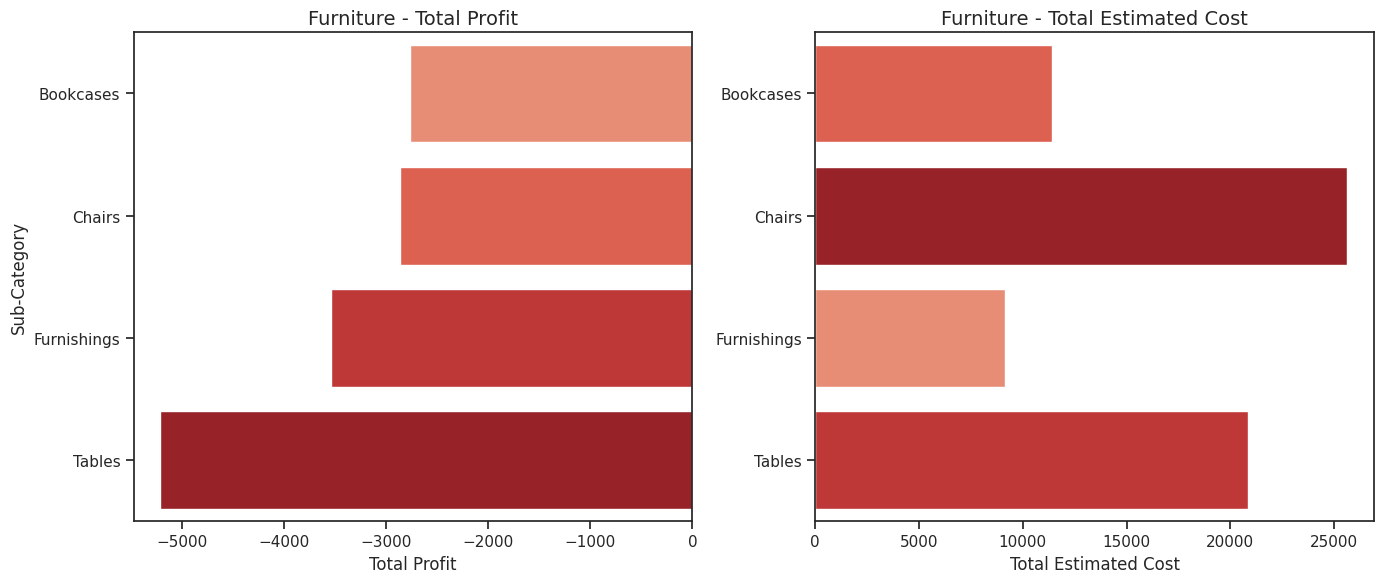

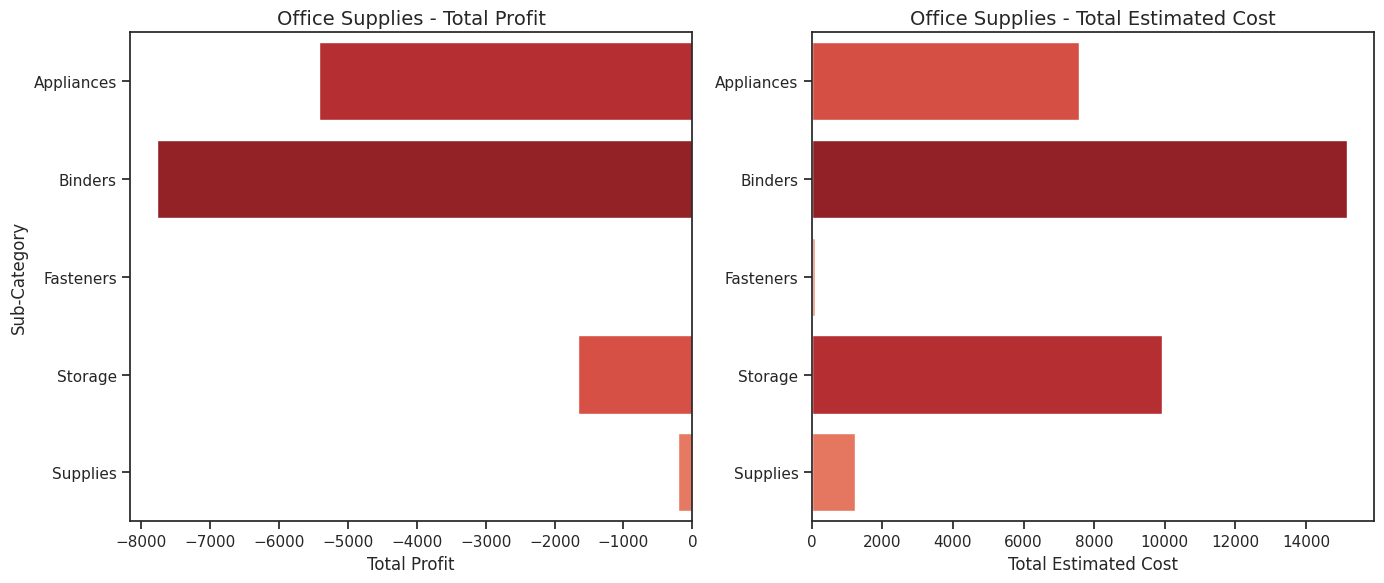

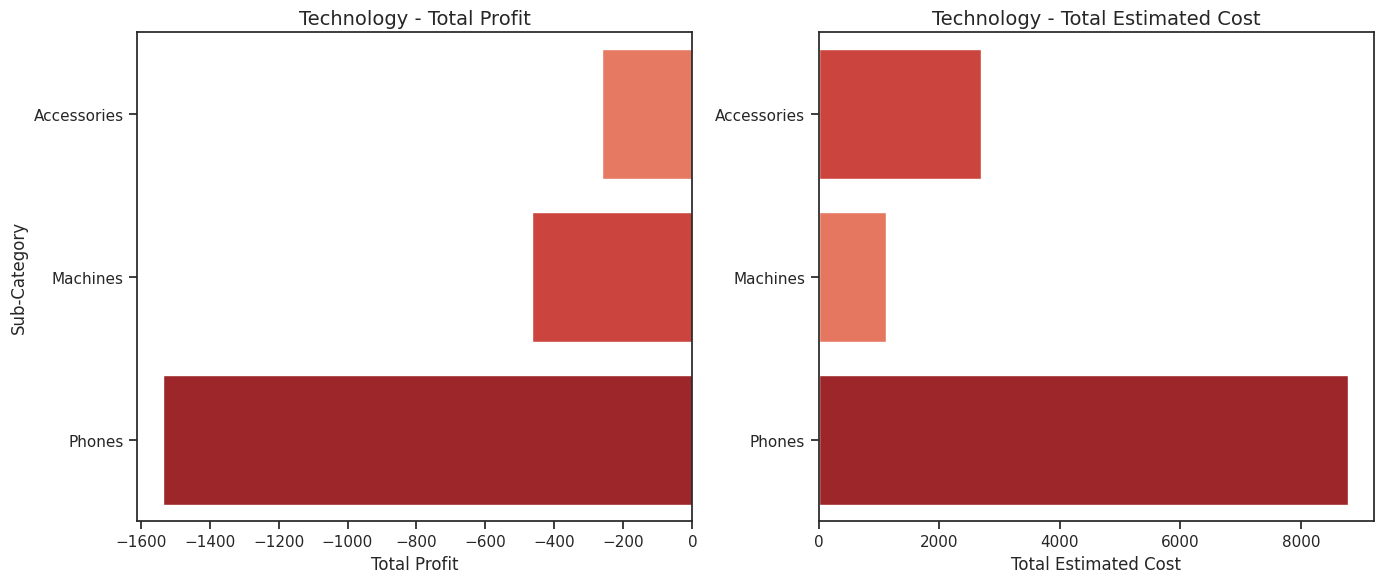

In [49]:
# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

# Filepath template
save_path_template = "/content/{group}_loss_cost.png"

# Call the function
plot_discount_loss_grid_1x2(
    data=summary_table_category,
    group_by_columns=['Category', 'Sub-Category'],
    discount_column="Estimated Cost",
    profit_column="Profit",
    palette1=palette1,
    palette2=palette2,
    save_path_template=save_path_template
)

### Sub-Category Loss Cost Analysis

1. **Top Loss Contributors:**
   - **Binders** (Office Supplies) has the highest loss at **-\$7769.36**, accompanied by a high estimated cost of **\$15164.26**, suggesting inefficiencies or overstocking.
   - **Appliances** (Office Supplies) and **Tables** (Furniture) also contribute significantly to losses, with profits of **-\$5417.54** and **-\$5216.67**, respectively. Their costs are substantial at **\$7565.01** and **20862.44**, indicating a need for cost control or sales strategy improvement.

2. **Furniture Category Dominance:**
   - Furniture accounts for a large proportion of losses, with **Chairs**, **Bookcases**, and **Furnishings** collectively losing over **-\$9168.35** in profit. These sub-categories also carry high estimated costs, particularly **Chairs** at **\$25633.21**, warranting targeted investigation.

3. **Technology Insights:**
   - Technology items like **Phones** and **Machines** also show losses, though on a smaller scale compared to Furniture and Office Supplies. **Phones** has a loss of **-1534.06** with a moderate cost of **8771.25**, while **Machines** has a loss of **-464.67** against a relatively low cost of **1123.45**.

4. **Low-Cost Losses:**
   - Sub-categories such as **Fasteners** and **Supplies** report small losses (**-18.27** and **-213.20**, respectively), but their costs are also minimal (**100.44** and **1218.47**). These likely represent less significant financial impact compared to high-loss categories.

5. **Actionable Focus Areas:**
   - **Binders** and **Tables** deserve immediate attention for cost reduction or sales improvement.
   - The Furniture category as a whole is a major loss driver and should be reassessed in terms of pricing, cost management, or inventory strategies.



# Region, Category, Sub-Category

In [51]:
# Grouping the data by Category, Sub-Category, and Region
summary_table = df.groupby(['Region', 'Category', 'Sub-Category'], observed=True).agg({
    'Profit': 'sum',
    'Estimated Cost': 'sum',
    'Discount': 'sum'
}).reset_index()

# Sorting the data by total Profit in ascending order (for losses)
summary_table_category = summary_table.sort_values(by='Profit', ascending=True)

# Separate data for categories
ft_table = summary_table_category[summary_table_category['Category'].isin(['Furniture', 'Technology'])].copy()
office_table = summary_table_category[summary_table_category['Category'].isin(['Office Supplies'])].copy()

# Reset categories for Sub-Category in each dataset
ft_table['Sub-Category'] = ft_table['Sub-Category'].astype('object').astype('category')
office_table['Sub-Category'] = office_table['Sub-Category'].astype('object').astype('category')

# Sort tables by Profit
ft_table_sorted = ft_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
office_table_sorted = office_table.sort_values(by='Profit', ascending=True).reset_index(drop=True)
# show the furniture table
ft_table_sorted

,Region,Category,Sub-Category,Profit,Estimated Cost,Discount
0,Central,Furniture,Furnishings,-3358.6064,7028.8824,41.40
1,East,Furniture,Tables,-1983.7433,8908.6883,9.90
2,West,Furniture,Bookcases,-1493.2825,4443.8775,5.25
3,West,Furniture,Tables,-1484.7722,5650.5172,6.80
4,East,Technology,Phones,-1374.9693,7916.0433,13.60
5,Central,Furniture,Chairs,-1032.5475,8409.4065,9.00
6,Central,Furniture,Tables,-973.0478,3745.4088,5.40
7,East,Furniture,Bookcases,-952.8625,3585.7125,4.30
8,East,Furniture,Chairs,-775.2814,6441.9314,7.60
9,South,Furniture,Tables,-775.1124,2557.8294,3.00


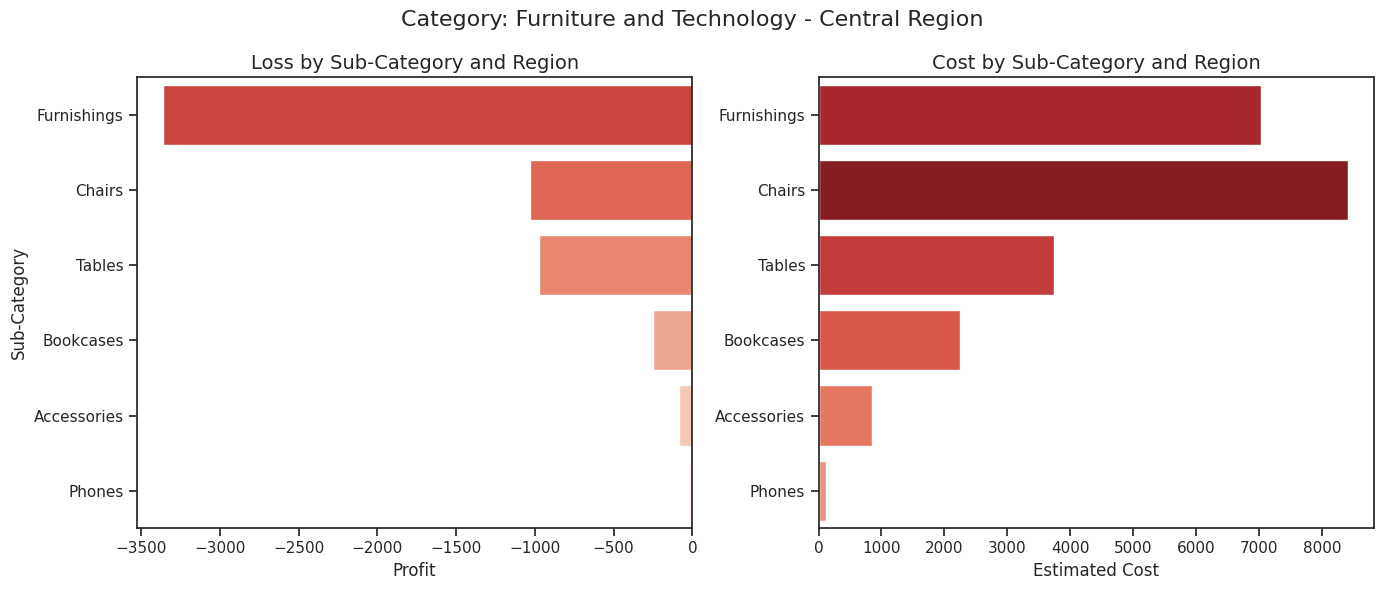

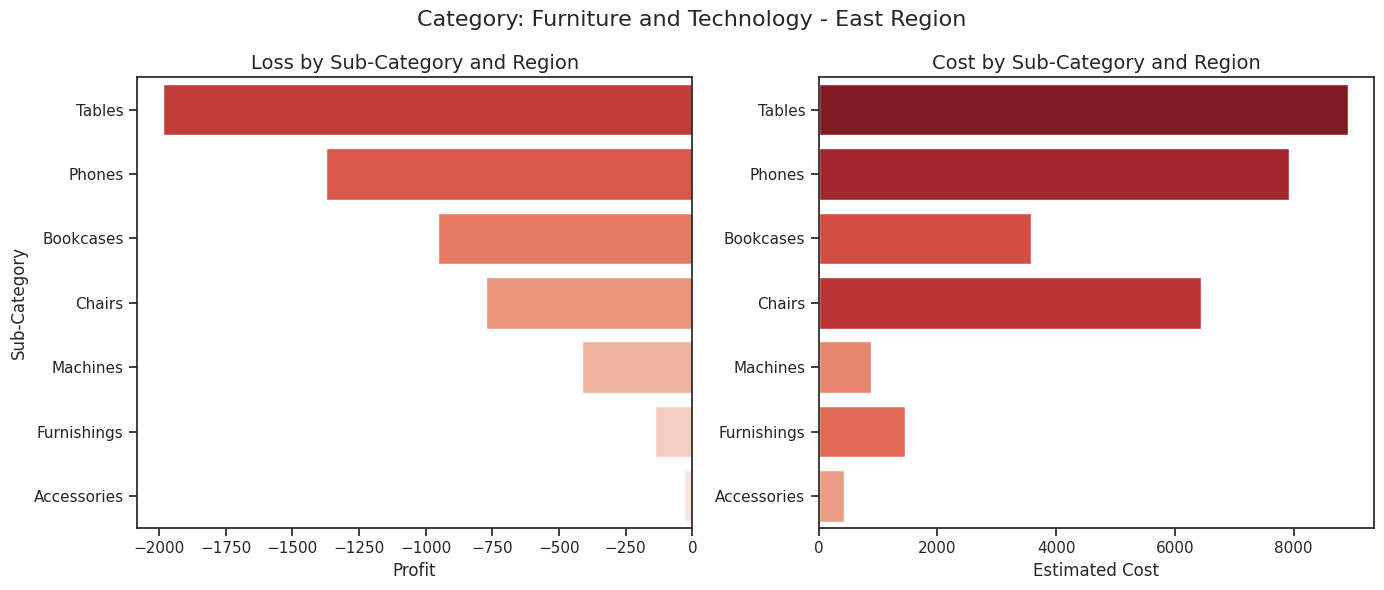

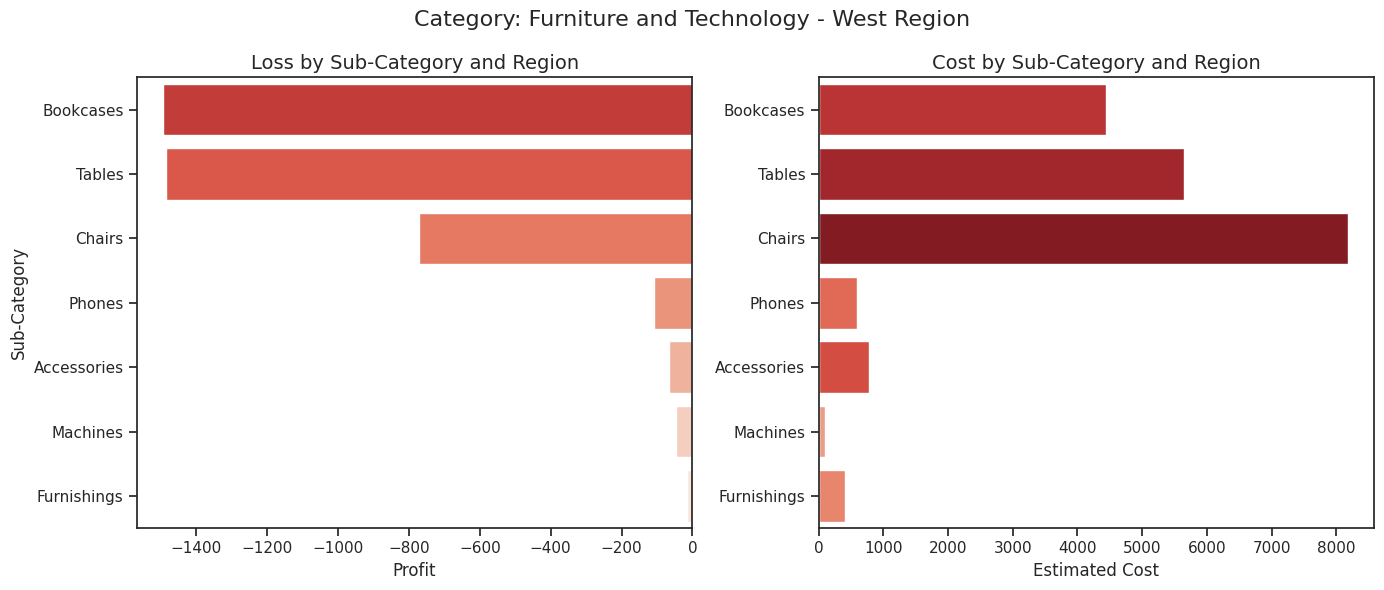

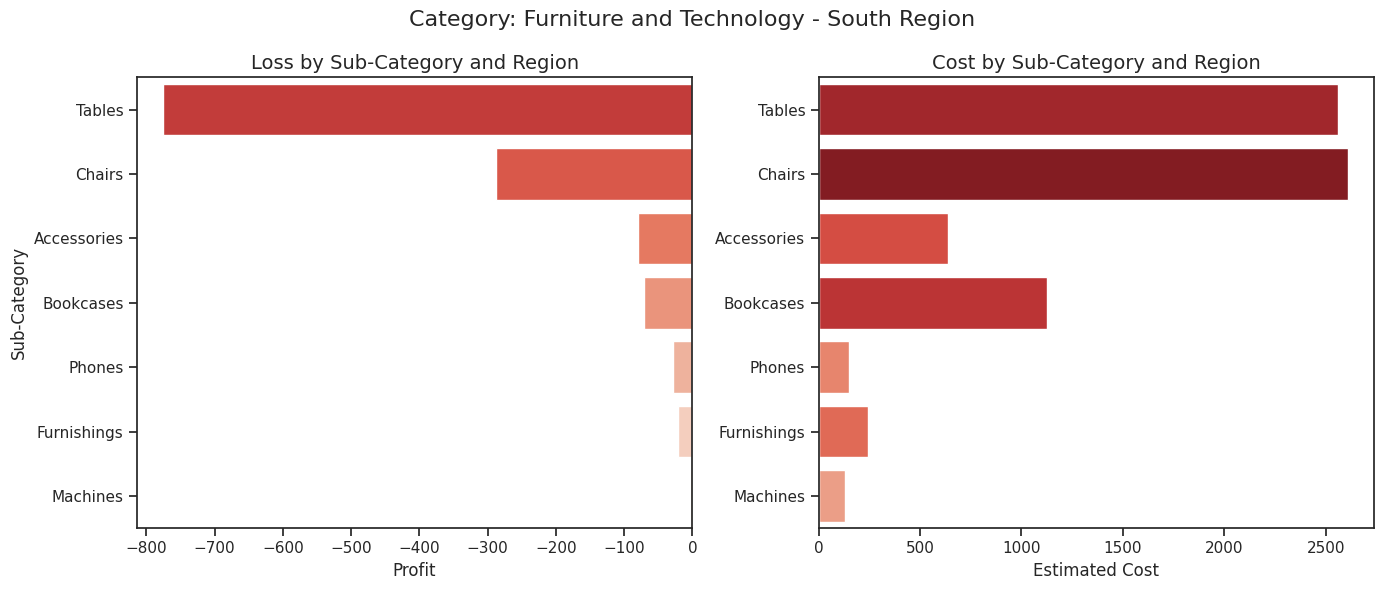

In [56]:
# Loop through regions and plot for each
regions = df['Region'].unique()

# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

for r in regions:
    # Filter data for the current region
    ft_table_region = ft_table_sorted[ft_table_sorted['Region'] == r]

    # Plot Furniture and Technology data
    dvu.plot_category_subcategory_loss_grid_with_region(
        data=ft_table_region,
        category_column='Category',
        sub_category_column='Sub-Category',
        region_column='Region',
        discount_column='Estimated Cost',
        profit_column='Profit',
        title=f"Furniture and Technology - {r} Region",
        palette1=palette1,
        palette2=palette2
    )


### Furniture & Technology by Region Analysis:

### Analysis of Losses and Costs by Region for Furniture and Technology Categories:

1. **Major Losses Concentrated in Furniture:**
   - The **Central** region's **Furnishings** and **Chairs** sub-categories have some of the highest losses, with losses reaching **-\$3358.61** and **-\$1032.55**, accompanied by significant costs of **\$7028.88** and **\$8409.41**, respectively.
   - The **East** region's **Tables** sub-category incurred a notable loss of **-\$1983.74**, with high costs of **\$8908.69**, indicating inefficiencies or over-discounting in this sub-category.

2. **Technology Losses Are Smaller but Significant in Specific Sub-Categories:**
   - **Phones** in the **East** region had a loss of **-\$1374.97**, with costs of **\$7916.04**, highlighting a critical area for review in pricing or inventory management.
   - The **West** region's **Machines** sub-category had a smaller loss of **-\$45.99** with a low cost of **\$105.99**, showing minimal impact on overall losses.

3. **Regional Disparities in Loss Patterns:**
   - The **West** region shows widespread but smaller losses in multiple sub-categories, such as **Bookcases (-\$1493.28)** and **Accessories (-66.97)**, indicating inefficiencies across various products rather than concentrated losses.
   - The **South** region's losses are lower in magnitude but prevalent across diverse sub-categories, including **Tables (-775.11)** and **Bookcases (-70.23)**.

4. **Discount Levels Drive Losses in Some Regions:**
   - High discount rates, such as **41.4% for Central Furnishings** and **13.6% for East Phones**, correlate strongly with higher losses, suggesting the need to reassess discounting strategies in these regions.

5. **Actionable Insights for Cost Optimization:**
   - **Furniture** sub-categories like **Furnishings, Tables, and Chairs** in the Central and East regions, with both high losses and high costs, should be a priority for targeted cost reduction or improved pricing strategies.
   - In **Technology**, losses in sub-categories such as **Phones** in the East and West regions should prompt a review of inventory, marketing, and discounting practices.



###Office Supplies by Region Analysis

In [ ]:
office_table_sorted

,Region,Category,Sub-Category,Profit,Estimated Cost,Discount
0,Central,Office Supplies,Appliances,-5417.5448,7565.0128,30.4
1,Central,Office Supplies,Binders,-4203.2011,6771.5551,94.4
2,East,Office Supplies,Binders,-1828.9757,4267.5467,58.1
3,South,Office Supplies,Binders,-1250.7998,2957.9258,45.5
4,Central,Office Supplies,Storage,-735.1298,4525.5138,5.0
5,West,Office Supplies,Binders,-486.3842,1167.2342,23.1
6,East,Office Supplies,Storage,-427.4350,2419.0110,3.4
7,West,Office Supplies,Storage,-247.5397,1467.2597,1.2
8,South,Office Supplies,Storage,-243.4824,1497.7224,2.2
9,East,Office Supplies,Supplies,-152.3524,851.8004,1.0


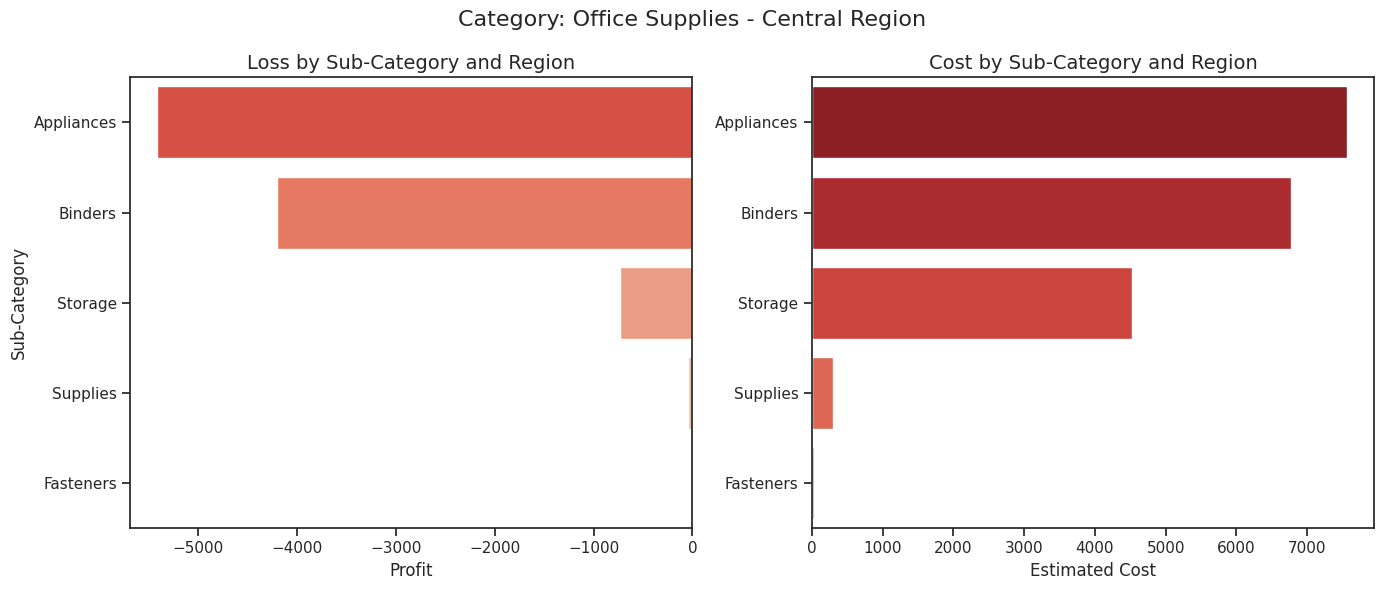

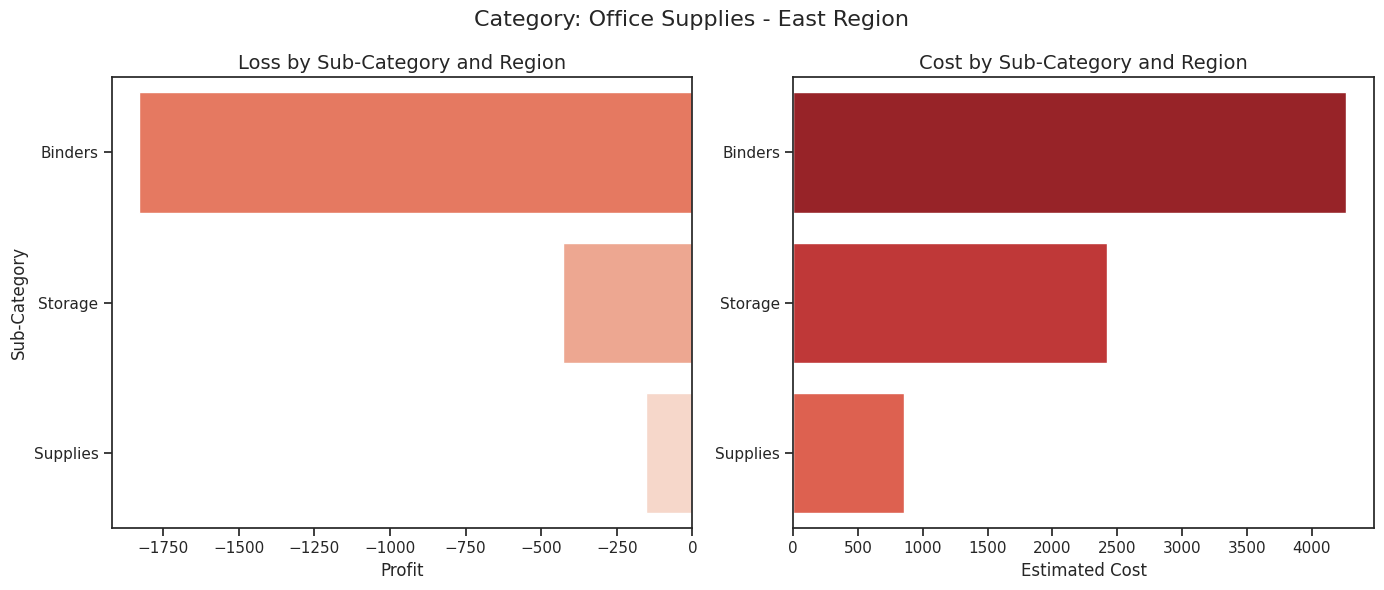

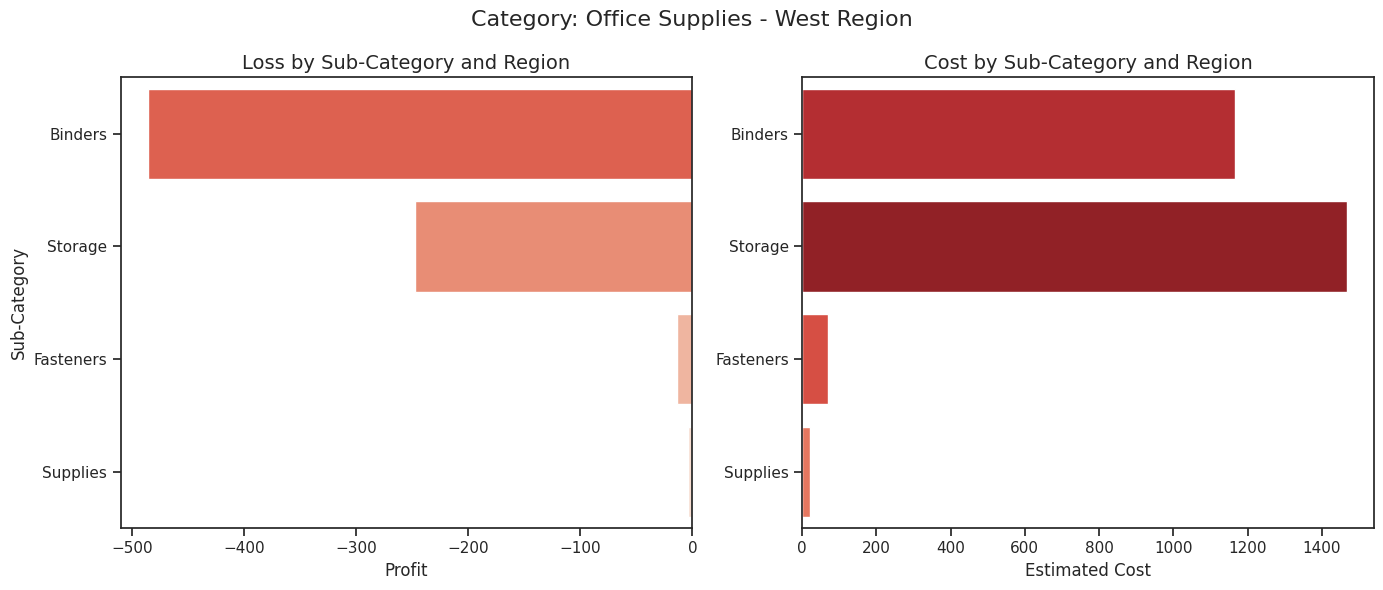

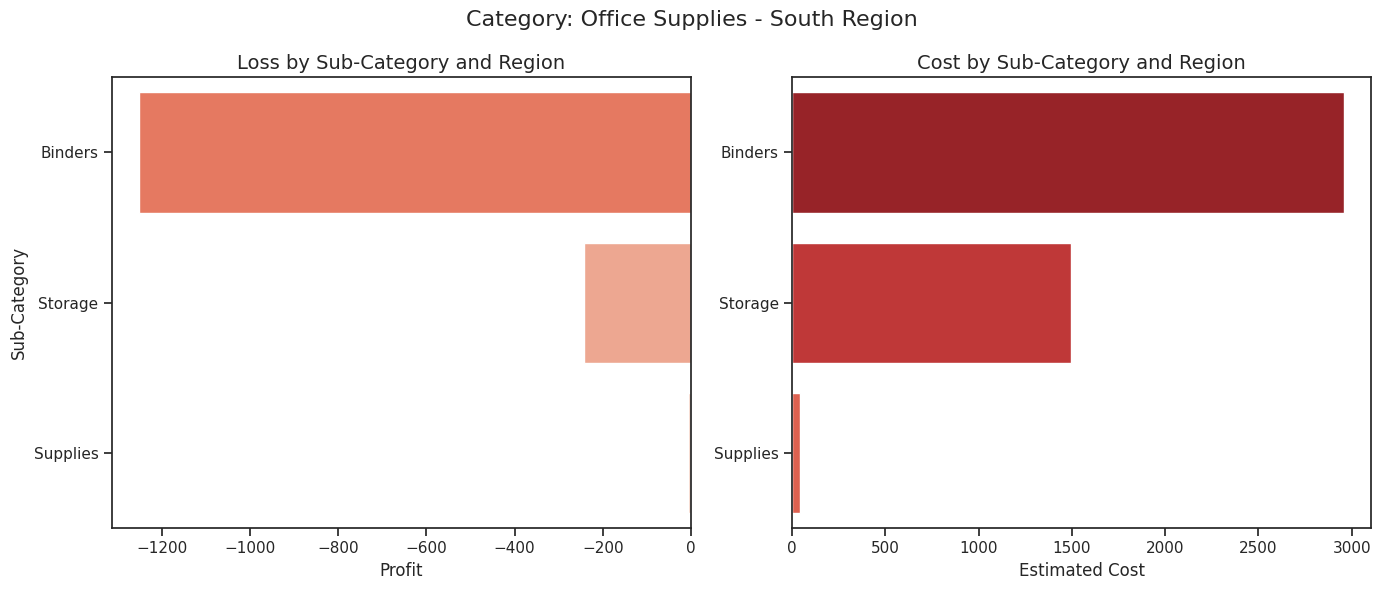

In [64]:
# Loop through regions and plot for each
regions = df['Region'].unique()

# Define palettes
palette1 = "Reds_r"
palette2 = "Reds"

for r in regions:
    # Filter data for the current region
    ft_table_region = office_table_sorted[office_table_sorted['Region'] == r]

    # Plot Furniture and Technology data
    dvu.plot_category_subcategory_loss_grid_with_region(
        data=ft_table_region,
        category_column='Category',
        sub_category_column='Sub-Category',
        region_column='Region',
        discount_column='Estimated Cost',
        profit_column='Profit',
        title=f"Office Supplies - {r} Region",
        palette1=palette1,
        palette2=palette2
    )




### Office Supplies by Region Loss and Costs Analysis  

1. **Concentration of Losses in Central Region:**
   - The **Central** region accounts for significant losses in **Appliances (-\$5417.54)** and **Binders (-\$4203.20)**, accompanied by high costs of **\$7565.01** and **\$6771.56**, respectively. These categories also show high discount rates, such as **94.4% for Binders**, highlighting aggressive discounting as a potential driver of losses.

2. **Binders Show Losses Across All Regions:**
   - **Binders** are a consistent source of losses in the **Central, East, South, and West** regions. For example:
     - **Central Binders**: Loss of **-\$4203.20** with costs of **\$6771.56**.
     - **East Binders**: Loss of **-\$1828.98** with costs of **\$4267.55**.
     - This suggests systemic inefficiencies in pricing, inventory, or demand forecasting for this sub-category.

3. **Storage Sub-Category Exhibits Moderate Losses:**
   - **Storage** has moderate losses across all regions, with costs ranging from **\$$2419 (East)** to **\$4525 (Central)**. These losses are coupled with relatively low discount rates (e.g., **5% in Central**), indicating that factors other than discounting, such as high operational costs, may be contributing to losses.

4. **Supplies and Fasteners Have Minimal Losses:**
   - Losses in **Supplies** and **Fasteners** are minimal across all regions, with the **West** region showing the smallest losses (e.g., **-4.18** in Supplies and **-13.38** in Fasteners). These categories have low associated costs and discounts, making them less critical areas for intervention.

5. **Key Areas for Focus:**
   - **Appliances** and **Binders** in the **Central** region require immediate attention due to their high losses and costs.
   - The **Binders** sub-category across all regions should be reviewed to identify inefficiencies in discounting strategies or demand management.
   - **Storage** in the Central and East regions presents an opportunity to optimize operational costs or improve profitability through better inventory practices.


#### Data Utils Script

In [1]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Profitability Ratio
    # Avoid division by zero errors by checking non-zero estimated cost
    data['Profitability Ratio'] = data.apply(
        lambda row: (row['Profit'] / row['Estimated Cost']) * 100 if row['Estimated Cost'] != 0 else 0,
        axis=1
    )

    # 4. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 5. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # # Visualize unique value counts
    # palette = sns.color_palette("Pastel2", len(filtered_counts))
    # plt.figure(figsize=(9, 5))
    # filtered_counts.sort_values(ascending=False).plot(
    #     kind='bar',
    #     color=palette,
    #     edgecolor='black'
    # )
    # plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    # plt.xlabel('Columns', fontsize=12)
    # plt.ylabel('Number of Unique Categories', fontsize=12)
    # plt.xticks(rotation=45, ha='right', fontsize=10)
    # plt.grid(axis='y', linestyle='--', alpha=0.3)
    # plt.tight_layout()
    # plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns, observed=True).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data

def detect_outliers_tukey(data, column):
    """
    Detects outliers using Tukey's Fences method for a specified column.

    Parameters:
    - data: DataFrame
        The dataset to analyze.
    - column: str
        The column for which to detect outliers.

    Returns:
    - non_outliers: DataFrame
        Subset of data without outliers.
    - outliers: DataFrame
        Subset of data containing outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    non_outliers = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)]

    return non_outliers, outliers

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.

    Example:
        filtered_data, outliers = remove_outliers_tukey(data, column='Sales', plot=True)

    Notes:
        - This function uses Tukey's Fences (IQR method) to detect and remove outliers.
        - Suitable for continuous numeric data with potential outliers.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Lower Fence: {lower_fence:.2f}, Upper Fence: {upper_fence:.2f}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Plot original data
        if len(data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=data[column], color='darkorange')
            plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

        # Plot filtered data
        if len(filtered_data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=filtered_data[column], color='pink')
            plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

    return filtered_data, outliers


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

#### Data Visualization Script

In [62]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()

def plot_sales_distribution_2(data, column='Sales', title='Distribution Visualizations', color='lightgreen', round_decimals=None):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.
        round_decimals (int, optional): Number of decimal places to round the x-axis values. Default is None.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total value
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of the column
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Dynamic x-axis
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)

    # Automatically format x-axis based on the data range
    x_max = data[column].max()
    x_min = data[column].min()
    x_ticks = plt.MaxNLocator(nbins=6).tick_values(x_min, x_max)

    # Round x-axis values if specified
    if round_decimals is not None:
        x_ticks = [round(tick, round_decimals) for tick in x_ticks]
        axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}" if round_decimals == 0 else f"{x:,.{round_decimals}f}"))

    axes[2].xaxis.set_ticks(x_ticks)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    # plt.show()


# Define a function to calculate summary statistics for a given column
def calculate_discount_stats(data, column='Discount'):
    """
    Calculates summary statistics for a specific column in the given dataset.

    Args:
        data (pd.DataFrame): The dataset to calculate statistics from.
        column (str): The column to calculate statistics for.

    Returns:
        dict: A dictionary of summary statistics.
    """
    stats = {
        'Min': data[column].min(),
        'Max': data[column].max(),
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Standard Deviation': data[column].std()
    }
    return stats

def plot_discount_summary(discount_summary_table, title="Summary Statistics for Discounts"):
    """
    Plots a grouped barplot for discount summary statistics.

    Args:
        discount_summary_table (pd.DataFrame): DataFrame containing summary statistics for discounts.
        title (str): Title for the plot.

    Returns:
        None: Displays the barplot.
    """
    # Melt the DataFrame to long format for easier plotting with Seaborn
    discount_summary_melted = discount_summary_table.melt(
        id_vars='Statistic',
        var_name='Group',
        value_name='Value'
    )

    # Set Seaborn theme
    sns.set_theme(style="whitegrid", context="talk")

    # Create the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=discount_summary_melted,
        x='Statistic',
        y='Value',
        hue='Group',
        palette=['red', 'green']
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Statistic", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_discount_kde(data_losses, data_profits, column='Discount', title='Plot for Costs'):
    """
    Plots overlaying KDE plots for discounts in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the KDE plot.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", linewidth=2)

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)

    # Add legend
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Show the plot
    plt.tight_layout()
    # plt.show()

def plot_discount_boxplot(data_losses, data_profits, column='Discount', title='Boxplot for Costs'):
    """
    Plots side-by-side boxplots for costs in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the boxplot.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Create copies of the data to avoid SettingWithCopyWarning
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Create the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        showfliers=True
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Group", fontsize=14)
    plt.ylabel(column, fontsize=14)

    # Remove legend for simplicity
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.tight_layout()
    # plt.show()

def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    # plt.show()

def plot_discount_analysis_grid(data_losses, data_profits, summary_table, column='Discount'):
    """
    Creates a grid of plots for discount analysis, including:
    - A barplot of summary statistics
    - A KDE plot of discount distributions
    - A boxplot comparing discounts by profitability.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        summary_table (pd.DataFrame): Summary statistics table for discounts.
        column (str): The column to analyze. Default is 'Discount'.

    Returns:
        None: Displays the plots.
    """
    import pandas as pd
    import matplotlib.gridspec as gridspec

    # Create copies to avoid warnings
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Set up the grid layout
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2,1], height_ratios=[1, 1], hspace=0.3, wspace=0.2)

    # Plot 1: Summary statistics barplot
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(
        data=summary_table.melt(id_vars=['Statistic'], var_name='Group', value_name='Value'),
        x='Statistic',
        y='Value',
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax1
    )
    ax1.set_title("Summary Statistics for Costs", fontsize=14)
    ax1.set_ylabel("Value", fontsize=12)
    ax1.set_xlabel("Statistic", fontsize=12)
    ax1.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 2: KDE plot
    ax2 = fig.add_subplot(gs[1,0])
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", ax=ax2, linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", ax=ax2, linewidth=2)
    ax2.set_title("Cost Distributions", fontsize=14)
    ax2.set_xlabel(column, fontsize=12)
    ax2.set_ylabel("Density", fontsize=12)
    ax2.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 3: Boxplot
    ax3 = fig.add_subplot(gs[:,1])
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax3,
        showfliers=True
    )
    ax3.set_title("Cost by Profitability", fontsize=14)
    ax3.set_xlabel("Group", fontsize=12)
    ax3.set_ylabel(column, fontsize=12)
    ax3.legend([], [], frameon=False)  # Remove redundant legend

    # Adjust layout and display the grid
    # plt.tight_layout()
    # plt.show()

def plot_metrics_grid(data1, data2=None, metrics=None, group_by_column="", title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for single or multiple datasets with multiple metrics.

    Args:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the x-axis.
        title_prefix (str): Prefix for each plot's title.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    datasets = [data1] if data2 is None else [data1, data2]
    titles = [""] if data2 is None else ["Dataset 1", "Dataset 2"]

    # Determine grid size
    n_cols = 3
    n_rows = -(-len(metrics) * len(datasets) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, metric in enumerate(metrics or []):
        for j, (data, title_suffix) in enumerate(zip(datasets, titles)):
            idx = i * len(datasets) + j
            if idx < len(axes):
                sns.barplot(
                    data=data.sort_values(by=metric, ascending=False),
                    x=group_by_column,
                    y=metric,
                    hue=metric, palette=palette, legend=False, dodge=False,
                    ax=axes[idx]
                )
                axes[idx].set_title(f"{title_prefix}{metric.replace('_', ' ')} {title_suffix}")
            else:
                axes[idx].axis('off')

    plt.tight_layout()
    # plt.show()

def plot_discount_loss_grid_1x2(data, group_by_columns, discount_column, profit_column, palette1, palette2, order_by, save_path_template=None, figsize=(14, 6)):
    """
    Plots discount and profit side by side for each group in a 1x2 grid, dynamically adapting palettes and sorting.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        group_by_columns (list): Columns to group by (e.g., ['Region', 'State']).
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        palette1 (str): Name of the palette for profit.
        palette2 (str): Name of the palette for discount.
        order_by (str): Column to sort by within each group (e.g., 'Total_Profit').
        save_path_template (str): Template for saving plots (e.g., "/path/to/{group}_plot.png").
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots and saves them to files if `save_path_template` is provided.
    """
    # Aggregate data for the given group_by_columns
    grouped_data = data.groupby(group_by_columns, observed=True).sum().reset_index()

    # Extract unique group values for looping
    unique_groups = grouped_data[group_by_columns[0]].unique()

    for group in unique_groups:
        # Filter data for the current group
        filtered_data = grouped_data[grouped_data[group_by_columns[0]] == group]

        # Sort the data by the specified column
        filtered_data = filtered_data.sort_values(by=order_by, ascending=True)

        # Calculate number of unique categories
        n_cats = filtered_data[group_by_columns[-1]].nunique()

        # Dynamically generate palettes
        p1 = sns.color_palette(palette1, n_colors=n_cats + 2)[:n_cats]  # Avoid light colors
        p2 = sns.color_palette(palette2, n_colors=n_cats + 2)[-n_cats:]  # Avoid light colors

        # Set up the grid for side-by-side plots
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # Plot profit (left)
        sns.barplot(
            data=filtered_data,
            x=profit_column,
            y=group_by_columns[1],
            hue=filtered_data[profit_column],
            palette=p1,
            order=filtered_data[group_by_columns[1]],
            legend=False,
            dodge=False,
            ax=axes[0]
        )
        axes[0].set_title(f"{group} - Total Profit", fontsize=14)
        axes[0].set_xlabel("Total Profit", fontsize=12)
        axes[0].set_ylabel(group_by_columns[1].replace('_', ' '), fontsize=12)

        # Plot discount (right)
        sns.barplot(
            data=filtered_data,
            x=discount_column,
            y=group_by_columns[1],
            hue=filtered_data[discount_column],
            palette=p2,
            order=filtered_data[group_by_columns[1]],
            legend=False,
            dodge=False,
            ax=axes[1]
        )
        axes[1].set_title(f"{group} - Total Estimated Cost", fontsize=14)
        axes[1].set_xlabel("Total Estimated Cost", fontsize=12)
        axes[1].set_ylabel("")  # No need for y-axis label on the second plot

        # Adjust layout
        plt.tight_layout()

        # Save the plot if a save path template is provided
        if save_path_template:
            save_path = save_path_template.format(group=group.replace(" ", "_"))
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figure saved as {save_path}")

        # Show the plot
        plt.show()



def plot_category_subcategory_loss_grid_with_region(data, category_column, sub_category_column, region_column,
                                                    discount_column, profit_column, title='Category:',
                                                    palette1='Reds', palette2='Reds_r', figsize=(14, 6)):
    """
    Plots profit and discount side by side for each sub-category grouped by category and region.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        category_column (str): Column name for category.
        sub_category_column (str): Column name for sub-category.
        region_column (str): Column name for region.
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        palette1 (str): Seaborn palette for the profit plot.
        palette2 (str): Seaborn palette for the discount plot.
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots.
    """
    if data.empty:
        print(f"No data available for plotting in region: {title}")
        return

    # Sort the data by profit to determine the order
    data_sorted = data.sort_values(by=profit_column, ascending=True)

    # Calculate unique subcategories for dynamic palette sizing
    n_cats = data_sorted[sub_category_column].nunique()

    # Generate palettes dynamically
    custom_palette_1 = sns.color_palette(palette1, n_colors=n_cats + 2)[2:]  # Avoid light colors
    custom_palette_2 = sns.color_palette(palette2, n_colors=n_cats + 3)[3:]  # Avoid light colors

    # Set up the grid for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Plot Profit (left)
    sns.barplot(
        data=data_sorted,
        x=profit_column,
        y=sub_category_column,
        order=data_sorted[sub_category_column],
        hue=data_sorted[profit_column],
        palette=custom_palette_1,
        legend=False,
        dodge=False,
        ax=axes[0]
    )
    axes[0].set_title("Loss by Sub-Category and Region", fontsize=14)
    axes[0].set_xlabel(profit_column, fontsize=12)
    axes[0].set_ylabel(sub_category_column.replace('_', ' '), fontsize=12)

    # Plot Discount (right)
    sns.barplot(
        data=data_sorted,
        x=discount_column,
        y=sub_category_column,
        order=data_sorted[sub_category_column],
        hue=data_sorted[discount_column],
        palette=custom_palette_2,
        legend=False,
        dodge=False,
        ax=axes[1]
    )
    axes[1].set_title("Cost by Sub-Category and Region", fontsize=14)
    axes[1].set_xlabel(discount_column, fontsize=12)
    axes[1].set_ylabel("")  # No need for y-axis label on the second plot

    # Adjust layout
    plt.suptitle(f"Category: {title}", fontsize=16)
    plt.tight_layout()
    plt.show()

'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>